# To-Do

- Ideen und Bedarfe hier sammeln, was noch kommen soll, einiges steht schon als Kommentar in den Zellen!
- Hinweis auf Setup mit Google Drive
- Absätze "Korpusgröße" und "Ngrams" nicht unter "Preprocessing", sondern separat, entweder gruppiert unter Header oder einfach zwischen "Preprocessing" und "Evaluation"


In [14]:
!pip install pandas
!pip install gensim==3.8.3
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
!pip install plotly
import os
import pandas as pd
import plotly.express as px

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this
print('MALLET SUCCESSFULLY INSTALLED')

#files_resolutions = 'https://raw.githubusercontent.com/DHBern/TopicModeling/main/Data/dataframes/data_stazh_tkr_df'
#dataframeimport = pd.read_pickle(files_resolutions)
#name_dataset_gensim = 'resolutions'
#name_dataset_mallet = 'resolutions'

name_dataset = 'all_transcripts_df_sentences_clean_normalized_5sentence(s)_NEW'
dataframeimport = pd.read_pickle(name_dataset)


#files_manuscripts = 'twinger_chronik_chunked_500_words' 
#dataframeimport = pd.read_pickle(files_manuscripts) 
#name_dataset = files_manuscripts


raw_data = dataframeimport.values.tolist() # Umwandlung des Dataframes in eine Liste
print(raw_data[0][:9])
print(len(raw_data))
data = [[word for word in line[1].split()] for line in raw_data] # Tokenisierung
print(data[0][:9])
print(len(data))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 37.3 MB/s eta 0:00:0000:0100:01
['DG1_sent 1', 'transcript ich hatte auch mit dem roten punkt da mein gerät da nich und muss man sich jetzt erst rein da hab ich erstmal angst gehabt sagt mein sohn da muss man auf die zahlen gucken und so ich sag das brauchste mir gar nicht sagen das geht in meinen kopf gar nicht rein ganz allein hab ich das gemerkt  em  ja das hat mir nicht gefallen nee das wollte ich jetzt nicht haben ']
57841
['transcript', 'ich', 'hatte', 'auch', 'mit', 'dem', 'roten', 'punkt', 'da']
57841


In [2]:
!pip install -i https://test.pypi.org/simple/ topic-modeling-moebusd==0.23

Looking in indexes: https://test.pypi.org/simple/


In [3]:
from topic_modeling import remove_stopwords_by_threshold

data_nostops = remove_stopwords_by_threshold(data, 0.1)

Ist Spacy installiert?
3649291


In [9]:
#from topic_modeling import topic_training_gensim
#lda_model_gensim, doc_tops_gensim, topwords_gensim = topic_training_gensim(data_nostops, name_dataset, 'moebusd', 50, passes_gensim=5, iterations_gensim=10)

from topic_modeling import topic_training_mallet
lda_model_mallet, doc_tops_mallet, topwords_mallet = topic_training_mallet(data, name_dataset, 'moebusd', 50, optimize_interval_mallet=50, iterations_mallet=500)

/bin/sh: 1: /content/mallet-2.0.8/bin/mallet: not found


CalledProcessError: Command '/content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/d161fd_corpus.txt --output /tmp/d161fd_corpus.mallet' returned non-zero exit status 127.

In [7]:
#from topic_modeling import print_topics_gensim
#print_topics_gensim(topwords_gensim, 15, name_dataset)

#from topic_modeling import print_topics_mallet
#print_topics_mallet(topwords_mallet, 15, name_dataset)

0 ['eh', 'irgendwie', 'wollte', 'gabs', 'nie', 'sei', 'nech', 'öh', 'dieser', 'lacht', 'sagte', 'hätte', 'mhm', 'nee', 'bisschen']

1 ['rb', 'al', 'pause', 'hätte', 'ob', 'sag', 'lacht', 'dieser', 'geld', 'familie', 'pauseund', 'schön', 'hause', 'gabs', 'sagt']

2 ['l', 'p', 'öh', 'pause', 'al', 'lacht', 'ihnen', 'ob', 'mussten', 'rb', 'etwas', 'zusammen', 'se', 'gab', 'dort']

3 ['wohl', 'frauen', 'mhm', 'wahr', 'seine', 'gekommen', 'nech', 'wollte', 'is', 'sei', 'ach', 'andere', 'kinder', 'vielleicht', 'nie']

4 ['frauen', 'sei', 'gab', 'dieser', 'ihnen', 'schule', 'anderen', 'eh', 'wohl', 'hätte', 'weg', 'irgendwie', 'sagte', 'mark', 'einmal']

5 ['etwas', 'frauen', 'bisschen', 'damit', 'zwei', 'hause', 'vielleicht', 'gegangen', 'dat', 'anderen', 'sagte', 'kein', 'kamen', 'sagt', 'weiter']

6 ['kamen', 'gab', 'ihnen', 'mhm', 'nech', 'eh', 'vielleicht', 'gesehen', 'sag', 'anderen', 'wollte', 'mussten', 'essen', 'zwei', 'weiter']

7 ['vielleicht', 'p', 'l', 'se', 'eh', 'sag', 'irgendw

In [16]:
from topic_modeling import doc_top_heatmap

doc_top_heatmap(doc_tops_gensim, topwords_gensim, raw_data, split_index=1) # Welche Bestandteile der Signatur für Y-Achse?

#Papers
Manuals:<br>
https://radimrehurek.com/gensim/auto_examples/index.html#documentation
https://pyldavis.readthedocs.io/en/latest/index.html

Tutorials:<br>
https://blog.codecentric.de/2017/01/topic-modeling-codecentric-blog-articles/
https://www.tutorialspoint.com/gensim/gensim_creating_lda_topic_model.htm

Papers:<br>
Blei et al.: https://jmlr.org/papers/volume3/blei03a/blei03a.pdf<br>
Thomsen/Mimno: https://arxiv.org/abs/2010.12626<br>
Sievert/Shirley: http://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf<br> 


# Einführung

Sie befinden sich nun in einer Programmierkonsole, die auf einer virtuellen Maschine, also nicht auf Ihrem Rechner ausgeführt wird. In den folgenden "Zellen" wechseln sich Textbausteine und Programmierzellen ab, in denen Sie Programmcode ausführen können. Alles ist soweit vorbereitet, dass Sie nur in der oberen linken Ecke einer Zelle zwischen den eckigen Klammern -> [  ] das Play-Symbol klicken müssen, das erscheint, wenn Sie mit der Maus über die Klammern fahren. Die Zellen müssen strikt in der Reihenfolge von oben nach unten ausgeführt werden, da spätere Zellen auf die Variablen voriger aufbauen. In einigen Zellen finden Sie auf der rechten Seite Parameter, die Sie einstellen können - probieren Sie ruhig alles aus und vergleichen Sie die Ergebnisse.


# Set up System

##Set Paths

In [ ]:
root = "/content/gdrive"
#@markdown path_name specifies the folder where everything is saved. 
path_name = "Data/" #@param {type:'string'}
path = root+"/My Drive/"+path_name


data_path = path
output_path = path+"OUTPUT/"


## Mount Drive Folders

In [ ]:
from google.colab import drive
drive.mount(root, force_remount=True)

Mounted at /content/gdrive


##Create Folders and Import Global Packages

In [ ]:
!pip install matplotlib
!pip install numexpr
import os
import re
from datetime import datetime
from pprint import pprint
import pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.matrix import heatmap

paths = [data_path, output_path]

for p in paths:
  print(p)
  #try to create output_path to save data

  try:
     os.mkdir(p)
  except OSError:
    print ("Directory %s already exists" % p)
  else:
    print ("Successfully created the directory %s " % p)

/content/gdrive/My Drive/Data/
Directory /content/gdrive/My Drive/Data/ already exists
/content/gdrive/My Drive/Data/OUTPUT/
Directory /content/gdrive/My Drive/Data/OUTPUT/ already exists


#Fertig berechnete Modelle laden
Hier können gespeicherte Modelle aus vorangegangenen Analysen geladen werden. Sämtliche Analyse- und Evaluationsfunktionen können mit den geladenen Daten genutzt werden. Das ermöglicht den schnellen paarweisen Vergleich einer großen Anzahl verschiedener - auch auf unterschiedlichen Datensätzen beruhender - Modelle. Nach dem erfolgreichen Ladevorgang muss <b>unter "Load Dataset" noch das zugrundeliegende Dataset ausgewählt</b> werden, dann kann direkt <b>in die Zelle "Topics ausgeben" und die folgenden Such- und Evaluationsroutinen gewechselt</b> werden.

In [ ]:
user ='Tobias' #@param ['Dennis', 'Ina', 'Tobias']
user_output = output_path+user+"/"
modeldumps = output_path+user+"/modeldumps/"

imports = [file for file in os.listdir(modeldumps) if 'mallet' in file]
for file in imports:
  print(file)

path_model_mallet = input('\n\nMallet-Modell aus Liste hier hinein kopieren')
df_import_doc_tops_mallet = pd.read_pickle(modeldumps+path_model_mallet+'/'+path_model_mallet+'.doc_tops_mallet')
doc_tops_mallet = df_import_doc_tops_mallet.values.tolist()
df_import_top_words_mallet = pd.read_pickle(modeldumps+path_model_mallet+'/'+path_model_mallet+'.top_words_mallet')
top_words_mallet = df_import_top_words_mallet.values.tolist()
settings = open(modeldumps+path_model_mallet+'/'+path_model_mallet+'.txt', mode='r', encoding='utf-8').read()

file = settings.splitlines()[0]
dataframeimport = pd.read_pickle(path+file)  
load_dataset_mallet = dataframeimport.values.tolist()
name_dataset_mallet = file
for line in settings.splitlines():
  if line.startswith('Anzahl Topics'):
    topics_mallet = int(line.split(': ')[1])
print(topics_mallet)


imports = [file for file in os.listdir(modeldumps) if 'gensim' in file]
for file in imports:
  print(file)

path_model_gensim = input('\n\nGensim-Modell aus Liste hier hinein kopieren')
df_import_doc_tops_gensim = pd.read_pickle(modeldumps+path_model_gensim+'/'+path_model_gensim+'.doc_tops_gensim')
doc_tops_gensim = df_import_doc_tops_gensim.values.tolist()
df_import_top_words_gensim = pd.read_pickle(modeldumps+path_model_gensim+'/'+path_model_gensim+'.top_words_gensim')
top_words_gensim = df_import_top_words_gensim.values.tolist()
settings = open(modeldumps+path_model_gensim+'/'+path_model_gensim+'.txt', mode='r', encoding='utf-8').read()

file = settings.splitlines()[0]
dataframeimport = pd.read_pickle(path+file)  
load_dataset_gensim = dataframeimport.values.tolist()
name_dataset_gensim = file
for line in settings.splitlines():
  if line.startswith('Anzahl Topics'):
    topics_gensim = int(line.split(': ')[1])
print(topics_gensim)

# Topic-Weights berechnen

sum_top_weights = 0.0
top_counter = 0
min_weight_gensim = 1
max_weight_gensim = 0
for line in doc_tops_gensim:
  for tup in line:
      sum_top_weights = sum_top_weights + float(tup[1])
      top_counter += 1
      if float(tup[1]) < min_weight_gensim:
        min_weight_gensim = float(tup[1])
      if float(tup[1]) > max_weight_gensim:
        max_weight_gensim = float(tup[1])

average_weight_gensim = sum_top_weights/top_counter

print('Minimales Topic-Weight Gensim: ' + str(min_weight_gensim))
print('Durchschnittliches Topic-Weight Gensim: ' + str(average_weight_gensim))
print('Maximales Topic-Weight Gensim: ' + str(max_weight_gensim))

sum_top_weights = 0.0
top_counter = 0
min_weight_mallet = 1
max_weight_mallet = 0
for line in doc_tops_mallet:
  for tup in line:
      sum_top_weights = sum_top_weights + float(tup[1])
      top_counter += 1
      if float(tup[1]) < min_weight_mallet:
        min_weight_mallet = float(tup[1])
      if float(tup[1]) > max_weight_mallet:
        max_weight_mallet = float(tup[1])

average_weight_mallet = sum_top_weights/top_counter

print('Minimales Topic-Weight Mallet: ' + str(min_weight_mallet))
print('Durchschnittliches Topic-Weight Mallet: ' + str(average_weight_mallet))
print('Maximales Topic-Weight Mallet: ' + str(max_weight_mallet))

load_models = True

NameError: ignored

#Installations & Import for Training New Models
[ToDo: Choose Spacy Model (to make the notebook multilingual)]

In [ ]:
#@markdown ##Installing Topic Modeling Engines (Mallet, Gensim) and/or SpaCy (for Lemmatization):
Load_gensim = True #@param {type:"boolean"}
Load_Mallet = True #@param {type:"boolean"}
#@markdown Be aware: Loading Mallet will take approx. two minutes.
Load_SpaCy_Ger = False #@param {type:"boolean"}
#@markdown Be aware: Loading a SpaCy Model will take several minutes.

!pip install gensim==3.8.3
if Load_Mallet == True:
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
    !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    !unzip mallet-2.0.8.zip

    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
    os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
    mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this
    print('MALLET SUCCESSFULLY INSTALLED')

if Load_SpaCy_Ger == True:
    !pip install --upgrade spacy
    !pip install https://github.com/explosion/spacy-models/releases/download/de_core_news_lg-3.2.0/de_core_news_lg-3.2.0.tar.gz

    import spacy
    print('SPACY SUCCESSFULLY INSTALLED')
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
print('GENSIM  SUCCESSFULLY INSTALLED')

!pip install tmtoolkit
#@markdown Should a dependency issue occur, this is due to a requirment by tmtoolkit. Don't restart the runtime.

#Load Dataset
Discuss/ToDo: Import from external sources (GitHub?, ideally link to txt-files --> requires building of df)
Discuss: Remove user, create list of data material (with possibility to add with link to dataframe)

In [ ]:
#@markdown #Dataset auswählen


user ='Tobias' #@param ['Dennis', 'Ina', 'Tobias']


if user == 'Dennis':

  files_dennis = 'comments_bfv_cod_wwII_complete_df' #@param ['ods_transcripts_df_sentences_clean_normalized_50sentence(s)_NEW', 'ods_transcripts_df_sentences_clean_normalized_25sentence(s)_NEW', 'ods_transcripts_df_sentences_clean_normalized_10sentence(s)_NEW', 'ods_transcripts_df_sentences_clean_normalized_5sentence(s)_NEW', 'ods_transcripts_df_sentences_clean_normalized_1sentence(s)_NEW', 'ods_transcripts_ddr_df_sentences_clean_normalized_25sentence(s)_NEW', 'ods_transcripts_ddr_df_sentences_clean_normalized_10sentence(s)_NEW', 'comments_cod_wwII_df', 'comments_bfv_complete_df', 'comments_bfv_cod_wwII_complete_df']
  dataframeimport = pd.read_pickle(path+files_dennis)  
  name_dataset_gensim = files_dennis
  name_dataset_mallet = files_dennis



if user == 'Ina':

  files_ina = 'commercial_sellers_df' #@param filename ['twinger_chronik_chunked_250_words', 'twinger_chronik_chunked_500_words', 'twinger_chronik_chunked_1000_words', 'twinger_chronik_chunked_2500_words', 'twinger_chronik_chunked_5000_words', 'twinger_chronik_fulltext', 'commercial_sellers_df']
  dataframeimport = pd.read_pickle(path+files_ina) 
  name_dataset_gensim = files_ina
  name_dataset_mallet = files_ina

if user == 'Tobias':

  files_tobias = 'daten_tobias_df' #@param filename ['daten_tobias_df']
  url = 'https://raw.githubusercontent.com/DHBern/TopicModeling/main/Data/dataframes/data_stazh_tkr_df'
  dataframeimport = pd.read_pickle(url)
  name_dataset_gensim = files_tobias
  name_dataset_mallet = files_tobias

user_output = output_path+user+"/"
modeldumps = output_path+user+"/modeldumps/"

try:
    os.mkdir(user_output)
except OSError:
  print ("Directory %s already exists" % user_output)
else:
  print ("Successfully created the directory %s " % user_output)

try:
    os.mkdir(modeldumps)
except OSError:
  print ("Directory %s already exists" % modeldumps)
else:
  print ("Successfully created the directory %s " % modeldumps)

raw_data = dataframeimport.values.tolist() # Umwandlung des Dataframes in eine Liste
print(raw_data[0][:9])
print(len(raw_data))
data = [[word for word in line[1].split()] for line in raw_data] # Tokenisierung
print(data[0][:9])
print(len(data))
print('SUCCESSFULLY PREPARED AND INGESTED DATA.')


#Load Stoplist
See Cell below: Make independent of Google Drive (Host Stopwordlists on GitHub)

In [ ]:
open_stoplist = 'gmh_stopwords_edited.txt' #@param ['german_stopwords_full_BE_MOD Topics.txt', 'german_stopwords_full_BE_MOD_games.txt','gmh_stopwords_edited.txt', 'german_stopwords_XIX.txt']

if open_stoplist == 'german_stopwords_full_BE_MOD Topics.txt' or open_stoplist == 'german_stopwords_full_BE_MOD_games.txt':
  encoding = 'UTF-16'
if open_stoplist == 'gmh_stopwords_edited.txt':
  encoding = 'UTF-8'
if open_stoplist == 'german_stopwords_XIX.txt':
  encoding = 'UTF-8'

stoplist = open(path+open_stoplist, encoding=encoding, mode='r').read().split()  # Stoplist Ina


print(stoplist[:90])






['aber', 'als', 'alle', 'am', 'an', 'andern', 'auch', 'auf', 'aus', 'bei', 'bey', 'bin', 'bis', 'bist', 'da', 'damit', 'dadurch', 'daher', 'darum', 'das', 'daß', 'dass', 'dein', 'deine', 'dem', 'den', 'der', 'des', 'dessen', 'dieselben', 'deshalb', 'die', 'dies', 'dieser', 'dieses', 'diesem', 'doch', 'dort', 'du', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'er', 'es', 'euer', 'eure', 'für', 'gegen', 'habe', 'hat', 'hatte', 'hatten', 'hattest', 'hattet', 'hier', 'hinter', 'ich', 'ihr', 'ihre', 'im', 'in', 'ist', 'ja', 'jede', 'jedem', 'jeden', 'jeder', 'jedes', 'jener', 'jenes', 'jetzt', 'kann', 'kannst', 'können', 'könnt', 'man', 'machen', 'mein', 'meine', 'möchte', 'mit', 'muß', 'mußt', 'musst', 'müssen', 'müßt']


Load Stoplist (from GitHub: https://github.com/DHBern/TopicModeling/tree/main/Stoppwordlists)

In [ ]:
import base64
import requests

open_stoplist = 'German_XIX' #@param ['German', 'French', 'German_XIX']

if open_stoplist == 'German_XIX':
  master_stoplist = "https://raw.githubusercontent.com/DHBern/TopicModeling/main/Stoppwordlists/german_stopwords_XIX.txt"
  req_stoplist = requests.get(master_stoplist)

if open_stoplist == 'German':
  master_stoplist = "https://raw.githubusercontent.com/DHBern/TopicModeling/main/Stoppwordlists/de.txt"
  req_stoplist = requests.get(master_stoplist)

if open_stoplist == 'French':
  master_stoplist = "https://raw.githubusercontent.com/DHBern/TopicModeling/main/Stoppwordlists/fr.txt"
  req_stoplist = requests.get(master_stoplist)

stoplist = req_stoplist.text

print(stoplist[:90])

aber
als
alle
am
an
andern
auch
auf
aus
bei
bey
bin
bis
bist
da
damit
dadu


#Preprocessing

## Stopwords entfernen

In [ ]:
#@markdown ###Choose Stopword Routine

stopword_routine = "curated_stoplist" #@param ["curated_stoplist", "stoplist_by_threshold"]

if stopword_routine == 'curated_stoplist':
  data_words_nostops = [[word for word in line if word not in stoplist] for line in data]
  print(data_words_nostops[0][:9])
  print(len(data_words_nostops))

if stopword_routine == 'stoplist_by_threshold':
  wordcounts = {}
  wordcount = 0

  #@markdown Threshold = Worthäufigkeit in Prozent
  threshold = 0.1 #@param {type:'number'}

  for line in data:
    wordcount = wordcount + len(line)

  for line in data:
    for word in line:
      if word not in wordcounts:
        wordcounts[word] = 1
      if word in wordcounts:
        wordcounts[word] += 1

  wordcounts_sorted = []

  for word, count in wordcounts.items():
    t = ((count/wordcount)*100, count, word)
    wordcounts_sorted.append(t)

  wordcounts_out = sorted(wordcounts_sorted, reverse=True)


  stoplist_by_threshold = [word[2] for word in wordcounts_out if word[0] > 0.1]

  data_words_nostops = [[word for word in line if word not in stoplist_by_threshold] for line in data]
  print(data_words_nostops[0][:9])

['ertheilung', 'landrechts', 'bäcker', 'johannes', 'huber', 'tuttlingen', 'kleine', 'rath', 'antrage']
6427


## Lemmatisierung

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'PROPN', 'VERBS', 'ADJ', 'ADV']):
  texts_out = []
  for sent in texts:
    doc = nlp(" ".join(sent))
    texts_out.append([token.lemma_ for token in doc])# if token.pos_ in allowed_postags])
  return texts_out

nlp = spacy.load('de_core_news_lg', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'PROPN', 'VERBS', 'ADJ', 'ADV']
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=allowed_postags) # hier können POS-Tags ein-/ausgeschlossen werden
#print('lemmata: ' + str(data_lemmatized[:9]))

# Lemmatisierte Daten erneut durch Stoplist schleifen
#@markdown Filter setzen für Mindestwortlänge (in Zeichen/Buchstaben)

min_wordlen = 2 #@param {type:"integer"}

data_final = [[word for word in doc if len(word) > min_wordlen and word not in stoplist] for doc in data_lemmatized] # Hier werden wörter mit weniger als drei Buchstaben ausgeschlossen
print(data_final[0][:9])
print(len(data_final))

['battlefield', 'spielgefühl']
15681


## Korpusgröße

In [ ]:


wordcount_data = 0
wordcount_data_words_nostops = 0
wordcount_data_final = 0

for doc in data:
  wordcount_data = wordcount_data + len(doc)
for doc in data_words_nostops:
  wordcount_data_words_nostops = wordcount_data_words_nostops + len(doc)
#for doc in data_final:
#  wordcount_data_final = wordcount_data_final + len(doc)

print('Words data: ' + str(wordcount_data))
print('Words data_words_nostops: ' + str(wordcount_data_words_nostops))
#print('Wörter data_final: ' + str(wordcount_data_final))


Words data: 1158029
Words data_words_nostops: 589169


##N-Grams

ToDo: Discuss how to deal with n-grams (either tackle in the paper or skip here)

In [ ]:
def ngrams_topics(data, n):


    words = data

    if n == '1':
      wordfreq = []
      for word in words:
        #for word in doc:
          wordfreq.append(word)
      return wordfreq
  
    if n == '2':
        a = 0
        b = 1
        bigrams = []
        counter = 0

        for doc in words:
          for word in doc:
 
            if counter < len(words) - 1:
                if words[a] in stoplist or words[b] in stoplist:
                    a = a + 1
                    b = b + 1
                    counter = counter + 1
                else:
                    x = words[a] + ' ' + words[b]
                    bigrams.append(x)
                    a = a + 1
                    b = b + 1
                    counter = counter + 1
        
        return bigrams


    if n == '3':
        a = 0
        b = 1
        c = 2
        trigrams = []
        counter = 0

        for doc in words:
          for word in doc:
            while counter < len(words) - 2:
                if words[a] and words[b] and words[c] in stoplist:
                    a = a + 1
                    b = b + 1
                    c = c + 1
                    counter = counter + 1
                else:
                    x = words[a] + ' ' + words[b] + ' ' + words[c]
                    trigrams.append(x)
                    a = a + 1
                    b = b + 1
                    c = c + 1
                    counter = counter + 1


        return trigrams

#@markdown #Auswählen: Worthäufigkeit, Bi- oder Trigramme
n = "3" #@param [1, 2,3]

#@markdown # Dataset auswählen
#@markdown data = voller Datensatz, normalisiert

#@markdown data_words_nostops = stopwortbereinigt

#@markdown data_final = stopwortbereinigt und lemmatisiert

dataset_ngrams = "data_words_nostops" #@param ['data', 'data_words_nostops', 'data_final']

if dataset_ngrams == 'data':
  dataset_ngrams = data
if dataset_ngrams == 'data_words_nostops':
  dataset_ngrams = data_words_nostops
if dataset_ngrams == 'data_final':
  dataset_ngrams = data_final

data_ngrams = [ngrams_topics(line, n) for id, line in enumerate(dataset_ngrams)] # ohne Lemmatisierung: data, line[1]


#print(data_ngrams)
freq = {}

for line in data_ngrams:
  for ngram in line:
    if ngram not in freq:
      freq[ngram] = 1
    else:
      freq[ngram] += 1

freq_sorted = []

if n == '1':
  for ngram, count in freq.items():
    t = (count, ngram, str(round(count/wordcount_data*100,2))+'%')
    freq_sorted.append(t)

if int(n) > 1:
  for ngram, count in freq.items():
    t = (count, ngram, str(round(count/(wordcount_data-int(n)+1)*100,2))+'%')
    freq_sorted.append(t)

freq_final_1 = sorted(freq_sorted, reverse=True)

pprint(freq_final_1[:99])



[(766, 'regierungsrath einsicht antrages', '0.07%'),
 (720, 'direktion öffentlichen arbeiten', '0.06%'),
 (663, 'einsicht antrages direktion', '0.06%'),
 (231, 'antrages direktion innern', '0.02%'),
 (163, 'antrages direktion öffentlichen', '0.01%'),
 (156, 'u s w', '0.01%'),
 (152, 'direktion innern beschließt', '0.01%'),
 (148, 'm h t', '0.01%'),
 (148, 'l m h', '0.01%'),
 (141, 'direktion öff arbeiten', '0.01%'),
 (136, 'öffentlichen arbeiten beschließt', '0.01%'),
 (134, 'antrag rathes innern', '0.01%'),
 (117, 'regierung l standes', '0.01%'),
 (111, 'ii mittheilung direktion', '0.01%'),
 (110, 'demnach regierungsrath einsicht', '0.01%'),
 (108, 'regierungsrath antrag rathes', '0.01%'),
 (102, 'weisung d d', '0.01%'),
 (102, 'geht antragstellung direktion', '0.01%'),
 (95, 'l commißion innern', '0.01%'),
 (89, 'ad acta legen', '0.01%'),
 (86, 'direktion justiz polizei', '0.01%'),
 (85, 'regierung st gallen', '0.01%'),
 (85, 'arbeiten beschließt i', '0.01%'),
 (84, 'commißion admini

#Evaluation der Topic Anzahl [in preparation]
Quelle: https://tmtoolkit.readthedocs.io/en/latest/topic_modeling.html#Evaluation-of-topic-models

Discuss: Should the Random Seed being chosen actively?

ToDo: Resolve Dependency Issues (tmtoolkit requires older SpaCy, which we don't need and older "albumentation")
--> TmToolkit is now installed before, let's see how this changes things...

In [ ]:
import random
random.seed(20191120)   # to make the sampling reproducible

import numpy as np
np.set_printoptions(precision=5)

import tmtoolkit

import logging
import warnings

#from tmtoolkit.utils import disable_logging

from tmtoolkit.topicmod import tm_lda

print(tm_lda.AVAILABLE_METRICS)
print(tm_lda.DEFAULT_METRICS)

from tmtoolkit.topicmod.tm_lda import compute_models_parallel

('loglikelihood', 'cao_juan_2009', 'arun_2010', 'coherence_mimno_2011', 'coherence_gensim_u_mass', 'coherence_gensim_c_v', 'coherence_gensim_c_uci', 'coherence_gensim_c_npmi')
('cao_juan_2009', 'arun_2010', 'coherence_mimno_2011')


In [ ]:
from tmtoolkit.corpus import Corpus
corp = data_words_nostops


#Train Models and Evaluate against each other
ToDo: Zeitangabe machen, das dauert ewig...

In [ ]:
from tmtoolkit.topicmod.tm_lda import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter

var_params = [{'alpha': 1/(10**x)} for x in range(1, 5)]

const_params = {
    'n_iter': 1000,
    'random_state': 20191122,  # to make results reproducible
    'eta': 0.1,                # sometimes also called "beta"
}

eval_results = evaluate_topic_models(corp,
                                     varying_parameters=var_params,
                                     constant_parameters=const_params,
                                     coherence_mimno_2011_top_n=10,
                                     coherence_mimno_2011_include_prob=True,
                                     return_models=True)
eval_results[:3]  # only show first three models

Process <class 'tmtoolkit.topicmod.tm_lda.MultiprocEvaluationWorkerLDA'>#0:
Process <class 'tmtoolkit.topicmod.tm_lda.MultiprocEvaluationWorkerLDA'>#1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.7/dist-packages/tmtoolkit/topicmod/parallel.py", line 284, in run
    results = self.fit_model(data, params)
  File "/usr/local/lib/python3.7/dist-packages/tmtoolkit/topicmod/parallel.py", line 284, in run
    results = self.fit_model(data, params)
  File "/usr/local/lib/python3.7/dist-packages/tmtoolkit/topicmod/tm_lda.py", line 80, in fit_model
    lda_instance = super(MultiprocEvaluationWorkerLDA, self).fit_model(data, params)
  File "/usr/local/lib/python3.7/dist-packages/tmtoolkit/topicmod/tm_lda.py", line 80, in fit_model
    lda_instance = supe

KeyboardInterrupt: ignored

#Training
ToDo/Discuss: Split Cell in
1) Data Set und Parameter
2) Start Trainings

In [ ]:
#@markdown ##Anzahl Topics 


topics =   50#@param {type:"integer"}
chunks = len(data)

#@markdown ##Dataset auswählen

name_dataset = "data_words_nostops" #@param ['data', 'data_words_nostops', 'data_final', 'data_ngrams']

if name_dataset == 'data':
  dataset = data
if name_dataset == 'data_words_nostops':
  dataset = data_words_nostops
if name_dataset == 'data_final':
  dataset = data_final
if name_dataset == 'data_ngrams':
  dataset = data_ngrams

id2word = corpora.Dictionary(dataset) 

corpus = [id2word.doc2bow(text) for text in dataset]

# Berechnung beider Modelle (Gensim, Mallet)
#@markdown ##Parametertuning
#@markdown ###Gensim

random_state_gensim = 100 #@param {type:"integer"}
passes_gensim =  100#@param {type:"integer"}
iterations_gensim = 1000 #@param {type:"integer"}

#@markdown ###Mallet

random_seed_mallet = 100 #@param {type:"integer"}
optimize_interval_mallet = 500 #@param {type:"integer"}
iterations_mallet = 5000 #@param {type:"integer"}

lda_model_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, 
  num_topics=topics, random_state=random_state_gensim, update_every=0, minimum_probability=0, passes=passes_gensim, iterations=iterations_gensim, alpha='auto', 
  per_word_topics=True
)

lda_model_mallet = gensim.models.wrappers.ldamallet.LdaMallet(mallet_path, corpus=corpus, id2word=id2word, 
  num_topics=topics, iterations=iterations_mallet, optimize_interval=optimize_interval_mallet, random_seed=random_seed_mallet
)

# Document-Topics-Liste erstellen und Topic-Weights berechnen

doc_tops_import = lda_model_gensim.get_document_topics(corpus)

doc_tops_gensim = []
sum_top_weights = 0.0
top_counter = 0
min_weight_gensim = 1
max_weight_gensim = 0
for line in doc_tops_import:
  doc_tops_transfer = []
  for tup in line:
    if float(tup[1]) >= 0:
      sum_top_weights = sum_top_weights + float(tup[1])
      doc_tops_transfer.append(tup)
      top_counter += 1
      if float(tup[1]) < min_weight_gensim:
        min_weight_gensim = float(tup[1])
      if float(tup[1]) > max_weight_gensim:
        max_weight_gensim = float(tup[1])
  doc_tops_gensim.append(doc_tops_transfer)

average_weight_gensim = sum_top_weights/top_counter

print('Minimales Topic-Weight Gensim: ' + str(min_weight_gensim))
print('Durchschnittliches Topic-Weight Gensim: ' + str(average_weight_gensim))
print('Maximales Topic-Weight Gensim: ' + str(max_weight_gensim))


## Daten-Output Mallet konvertieren

doc_tops_import = open(lda_model_mallet.fdoctopics(), mode='r', encoding = 'UTF-8').read()

doc_tops_mallet = []
sum_top_weights = 0.0
top_counter = 0
min_weight_mallet = 1
max_weight_mallet = 0
for line in doc_tops_import.splitlines():
  doc_tops_transfer = []
  for topic_nr, topic in enumerate(line.split()):
    if '.' in topic:
      topic_float = float(topic)
      if topic_float >= 0: # Threshold für Weight
        sum_top_weights = sum_top_weights + topic_float
        top_counter += 1
        doc_tops_transfer.append((topic_nr - 2, topic_float)) # hier Weight als Float, in anderen Zellen als Str -> vereinheitlichen (?)
        if topic_float < min_weight_mallet:
          min_weight_mallet = topic_float
        if topic_float > max_weight_mallet:
          max_weight_mallet = topic_float        
  doc_tops_mallet.append(doc_tops_transfer)

average_weight_mallet = sum_top_weights/top_counter

print('Minimales Topic-Weight Mallet: ' + str(min_weight_mallet))
print('Durchschnittliches Topic-Weight Mallet: ' + str(average_weight_mallet))
print('Maximales Topic-Weight Mallet: ' + str(max_weight_mallet))

load_models = False
topics_gensim = topics
topics_mallet = topics

NameError: ignored

# Modelle speichern

Hier können die Dokument-Topic-Listen und Keyword-Listen der fertig berechneten Modelle abgespeichert werden. Für einen späteren Vergleich kann man die Modelle oben direkt abrufen und miteinander vergleichen, ohne jedesmal wieder neu trainieren zu müssen. Sämtliche Funktionen des Colabs laufen mit geladenen Daten.

In [ ]:
if load_models == True:
  print("Modell bereits gespeichert")

else:
  now = str(datetime.now())[:19]

  new_model_mallet = user+'_mallet_'+name_dataset_mallet+'_'+str(topics)+'topics_'+ now +'/'
  os.mkdir(modeldumps+new_model_mallet)
  doc_tops_mallet_df = pd.DataFrame(data=doc_tops_mallet)
  doc_tops_mallet_df.to_pickle(modeldumps+new_model_mallet+user+'_mallet_'+name_dataset_mallet+'_'+str(topics)+'topics_'+now +'.doc_tops_mallet')
  top_words_mallet_df = pd.DataFrame(data=lda_model_mallet.print_topics(num_topics=topics, num_words=1000))
  top_words_mallet_df.to_pickle(modeldumps+new_model_mallet+user+'_mallet_'+name_dataset_mallet+'_'+str(topics)+'topics_'+now +'.top_words_mallet')
  out = open(modeldumps+new_model_mallet+user+'_mallet_'+name_dataset_mallet+'_'+str(topics)+'topics_'+now +'.txt', 'w', encoding='UTF-8')
  out.write(name_dataset_mallet + '\n')
  out.write('Anzahl Topics: ' + str(topics) + '\n')
  if name_dataset == 'data_final':
    out.write('Stopwords: ' + open_stoplist + '\n')
    out.write('Lemmatisiert, Pos-Tag-Filter: ' + str(allowed_postags) + '\n')
  if name_dataset == 'data_words_nostops':
    out.write('Stopwords: ' + open_stoplist + '\n')
  if name_dataset == 'data':
    out.write('Kein Data Cleaning durchgeführt' + '\n')
  out.write('random_seed_mallet: ' + str(random_seed_mallet) + '\n')
  out.write('optimiize_interval_mallet: ' + str(optimize_interval_mallet) + '\n')
  out.write('iterations_mallet: ' + str(iterations_mallet) + '\n')
  out.close()

  new_model_gensim = user+'_gensim_'+name_dataset_gensim+'_'+str(topics)+'topics_'+now +'/'
  os.mkdir(modeldumps+new_model_gensim)
  doc_tops_gensim_df = pd.DataFrame(data=doc_tops_gensim)
  doc_tops_gensim_df.to_pickle(modeldumps+new_model_gensim+user+'_gensim_'+name_dataset_gensim+'_'+str(topics)+'topics_'+now +'.doc_tops_gensim')
  top_words_gensim_df = pd.DataFrame(data=lda_model_gensim.print_topics(num_topics=topics, num_words=1000))
  top_words_gensim_df.to_pickle(modeldumps+new_model_gensim+user+'_gensim_'+name_dataset_gensim+'_'+str(topics)+'topics_'+now +'.top_words_gensim')
  out = open(modeldumps+new_model_gensim+user+'_gensim_'+name_dataset_gensim+'_'+str(topics)+'topics_'+now +'.txt', 'w', encoding='UTF-8')  
  out.write(name_dataset_gensim + '\n')
  out.write('Anzahl Topics: ' + str(topics) + '\n')
  if name_dataset == 'data_final':
    out.write('Stopwords: ' + open_stoplist + '\n')
    out.write('Lemmatisiert, Pos-Tag-Filter: ' + str(allowed_postags) + '\n')
  if name_dataset == 'data_words_nostops':
    out.write('Stopwords: ' + open_stoplist + '\n')
  if name_dataset == 'data':
    out.write('Kein Data Cleaning durchgeführt' + '\n')
  out.write('random_state_gensim: ' + str(random_state_gensim) + '\n')
  out.write('passes_gensim: ' + str(passes_gensim) + '\n')
  out.write('iterations_gensim: ' + str(iterations_gensim) + '\n')
  out.close()

NameError: ignored

#Topics ausgeben

## Gensim

In [ ]:
#@markdown ##Wie viele Keywords pro Topic sollen angezeigt werden?

number_of_words = 30 #@param {type:"integer"}

#@markdown ##Keywords als Textdatei speichern (nur neue Modelle)?
save_doc = True #@param {type:"boolean"}

now = str(datetime.now())[:19]

if load_models == False:
  output = lda_model_gensim.print_topics(num_topics=topics, num_words=number_of_words)

  if save_doc:
    out = open(user_output+user+'_keywords_gensim_'+name_dataset_gensim+'_'+str(topics)+'topics_'+ str(number_of_words) + 'keywords'+now +'.txt', 'w', encoding='UTF-8')
    for line in output:
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", line[1]))+'\n'
      out.write(out_line)
      print(out_line)
    out.close()
  else:
    for line in output:
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", line[1]))+'\n'
      print(out_line)

if load_models == True:
  if save_doc:
    out = open(user_output+user+'_keywords_gensim_'+name_dataset_gensim+'_'+str(topics_gensim)+'topics_'+ str(number_of_words) + 'keywords'+now +'.txt', 'w', encoding='UTF-8')
    for line in top_words_gensim:
      newline = []
      for i in range (0, number_of_words):
        newline.append(line[1].split(' + ')[i])
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", str(newline)))+'\n'
      out.write(out_line)
      print(out_line)
    out.close()

  else:
    for line in top_words_gensim:
      newline = []
      for i in range (0, number_of_words):
        newline.append(line[1].split(' + ')[i])
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", str(newline)))+'\n'
      print(out_line)


0 ['hauptmann', 'zürich', 'd', 'regierungsrath', 'kriegsrathe', 'kriegsrathes', 'aufsichtsbehörde', 'direktor', 'stelle', 'm', 'gefangenen', 'kriegsrath', 'anstalt', 'v', 'weisung', 'infanterie', 'wahl', 'sträflinge', 'heinrich', 'betreffenden', 'eidg', '2ten', 'quartier', 'ernennung', 'a', '1sten', 'amtsblatt', 'bericht', 'großen', 'ernannt']

1 ['zürich', 'regierungsrath', 'u', 'd', 'i', 'beschluß', 'ii', 'l', 'a', 'direktion', 'bericht', 'verfügung', 'einsicht', 'ad', 'mittheilung', 'jahr', 'schweiz', 'b', 'v', 'kanton', 'gemeinde', 'dieselbe', 'm', 'regierung', 'stand', 'staat', 'öffentlichen', 'zuschrift', 'kaufmannschaft', 'geben']

2 ['l', 'stand', 'standes', 'regierung', 'st', 'gallen', 'stände', 'tagsatzung', 'rath', 'luzern', 'commißion', 'basel', 'schwytz', 'dießfälligen', 'hherren', 'kleinen', 'canton', 'hohen', 'mißiven', 'instruction', 'seyn', 'gegenstand', 'ständen', 'ehrengesandtschaft', 'cantons', 'conferenz', 'antwort', 'staatsrath', 'herren', 'seyen']

3 ['d', 'züric

## Mallet

In [ ]:
#@markdown ##Wie viele Keywords pro Topic sollen angezeigt werden?

number_of_words = 30 #@param {type:'integer'}

#@markdown ##Keywords als Textdatei speichern?
save_doc = True #@param {type:"boolean"}

now = str(datetime.now())[:19]

if load_models == False:
  output = lda_model_mallet.print_topics(num_topics=topics, num_words=number_of_words)

  if save_doc:
    out = open(user_output+user+'_keywords_mallet_'+name_dataset_mallet+'_'+str(topics)+'topics_'+ str(number_of_words) + 'keywords' + now +'.txt', 'w', encoding='UTF-8')
    for line in output:
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", line[1]))+'\n'
      out.write(out_line)
      print(out_line)
    out.close()

  else:
    for line in output:
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", line[1]))+'\n'
      print(out_line)

if load_models == True:
  if save_doc:
    out = open(user_output+user+'_keywords_mallet_'+name_dataset_mallet+'_'+str(topics_mallet)+'topics_'+ str(number_of_words) + 'keywords' + now +'.txt', 'w', encoding='UTF-8')
    for line in top_words_mallet:
      newline = []
      for i in range (0, number_of_words):
        newline.append(line[1].split(' + ')[i])
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", str(newline)))+'\n'
      out.write(out_line)
      print(out_line)
    out.close()

  else:
    for line in top_words_mallet:
      newline = []
      for i in range (0, number_of_words):
        newline.append(line[1].split(' + ')[i])
      out_line = str(int(line[0])) + ' ' + str(re.findall(r"\"(.*?)\"", str(newline)))+'\n'
      print(out_line)

0 ['Leben, Fr. Nicolai.', 'Aufzügen, vof Bouluh.', 'Stänbe, 2ter Bd.', 'Thl. nebst bessen', 'Thle. 797. fl.', 'Unterhaltungen Liebhaber Sonnenuhrkunst', 'Verfasser Pansalpin. 796.', 'bessen Leben, Fr.', 'Sonnenuhrkunst 1tes Heft', 'Stande, Kunstler, Ockonomen,', 'Liebhaber Sonnenuhrkunst 1tes', 'Bouluh. 797. brosch.', 'La Réligion vengée,', 'Kunstler, Ockonomen, Handwerker', 'Kunst Stande, Kunstler,', 'Kr. Cartesius, historisch-charckteristisches', 'Kinderfreund. 737. 50', 'Jungling, Kupfer 796.', 'Jugend gebildeter Stänbe,', 'Innhalts, Verfasser Pansalpin.', 'Handwerker ꝛc. Thle.', 'Greis Jungling, Kupfer', 'Gemalde zwey Aufzügen,', 'Fr. Nicolai. 797.', 'Fallstriß Ehre Rechthums,', 'Ehre Rechthums, Volksbuch', 'Der Greis Jungling,', 'Natur Kunst Stande,', 'Rochowischer Kinderfreund. 737.', 'Privatunterricht, 1ter Thl.,']

1 ['Leben, Fr. Nicolai.', 'Aufzügen, vof Bouluh.', 'Stänbe, 2ter Bd.', 'Thl. nebst bessen', 'Thle. 797. fl.', 'Unterhaltungen Liebhaber Sonnenuhrkunst', 'Verfasser P

/usr/local/lib/python3.7/dist-packages/gensim/models/wrappers/ldamallet.py:448: RuntimeWarning: invalid value encountered in true_divide
  topic = topic / topic.sum()  # normalize to probability dist


##Topword Diversity
Hier soll die Einzigartigkeit von Keywords innerhalb der Topics untersucht werden, in je weniger Topics ein Wort enthalten ist, desto trennschärfer sollten die Topics sein. Vgl. mit der Relevance Metric bei pyLDAvis, nähere Infos dazu im oben verlinkten Paper, und dem Exclusivity Score im Paper von Thompson/Mimno. Bislang harter Filter, es werden NUR einzigartige Wörter gezählt, ich möchte einen Threshold einbauen, dass "seltene" Wörter besser bewertet werden, also beispielsweise auch Wörter, die in 2-3 Topics vorkommen einen guten Score bekommen, Wörter, die in allen Topics vorkommen, einen schlechten. Das könnte man dann auch noch mit der jeweiligen Gewichtung im Topic verrechnen. Für Dennis hilfreich, weil er möglichst trennscharfe und konsistente Topics braucht, um die pluralistischen Inhalte der Sammlung abzubilden. -> evtl. noch in Zusammenhang mit Dictionary bringen

Gensim

In [ ]:
#Topword diversity
#@markdown Anzahl Topwords, die pro Topic zur prozentualen Berechnung einzigartiger Wörter unter den Topwords aller Topics herangezogen werden sollen.
number_of_words =  1000#@param {type:"integer"}

if load_models == False:
  topwords = []
  toptops = lda_model_gensim.print_topics(num_topics=int(topics), num_words=number_of_words) 
  for tupel in toptops:
    words = re.findall(r"\"(.*?)\"", tupel[1])
    for word in words:
      topwords.append(word)

if load_models == True:
    topwords = []
    for line in top_words_gensim:
      newline = []
      for i in range (0, number_of_words):
        newline.append(re.findall(r"\"(.*?)\"", line[1].split(' + ')[i])[0])
      for word in newline:
        topwords.append(word)

print(len(topwords))
print(len(set(topwords)))
singularity = (len(set(topwords)) / (int(topics_gensim) * number_of_words)) * 100
print(str(int(singularity))+'%')


50000
1691
3%


Mallet

In [ ]:
#Topword diversity
number_of_words =  100#@param {type:"integer"}

if load_models == False:
  topwords = []
  toptops = lda_model_mallet.print_topics(num_topics=topics, num_words=number_of_words)
  for tupel in toptops:
    words = re.findall(r"\"(.*?)\"", tupel[1])
    for word in words:
      topwords.append(word)

if load_models == True:
    topwords = []
    for line in top_words_mallet:
      newline = []
      for i in range (0, number_of_words):
        newline.append(re.findall(r"\"(.*?)\"", line[1].split(' + ')[i])[0])
      for word in newline:
        topwords.append(word)

print(len(topwords))
print(len(set(topwords)))
singularity = (len(set(topwords)) / (int(topics_mallet) * number_of_words)) * 100
print(str(int(singularity))+'%')


10000
7224
72%


#Calculate Coherence Score (Mallet) + Perplexity?
Läuft nicht mit geladenen Modellen

In [ ]:
coherence_model_ldamallet = CoherenceModel(model=lda_model_mallet, texts=dataset, dictionary=id2word, coherence='c_v')
coherence_lda_model_mallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_lda_model_mallet)

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

Coherence Score:  0.4813165043520427


# Analyse & Evaluation

##Search Routines for Close Reading

### Nach Chunks mit einem bestimmten Topic suchen [funktioniert für beide Engines, Perspektive: mehrere Topics auf einem Chunk finden, Prio 1]

Gensim

In [ ]:
#@markdown Nach welchem Topic (Nummer) soll gesucht werden?
topic_search = 7 #@param {type:'integer'}

#@markdown ##Threshold Topic-Weight
#@markdown If custom value is not checked, average topic weight is set as threshold.
threshold_custom_value = True #@param {type:"boolean"}
if threshold_custom_value == False:
  threshold_topic_weight = average_weight_gensim
if threshold_custom_value == True:
  threshold_topic_weight = 0.9945 #@param {type:"number"}

if load_models == True:
  raw_data = load_dataset_gensim

for j, line in enumerate(doc_tops_gensim):
  for tup in line:
    #print(tup)
    if tup[0] == topic_search and tup[1] >= threshold_topic_weight:    
      print(raw_data[j])


['Freiburg_UB_Hs__471_edited.txt 31', 'und ouch der kung und ains males fùr der kungussdem lande, do geviel josehh der kùngin also wol das sy in fùrte in ir kamer das er by ir schlieffe, do woltes er nit tuͦn und sprach min hern der kung hat kai ander guot wan des ich gwaltig bin und getruwet mir wol soͤlte ich im denne semlichischmachent tuͦn die kungin zech in by dem mantel joͤseph liesz ir den mantel und floch enweg, do nam die kùngin den mantl und zogte in des kùngs gesinde, do nu der kung wider ze land kam, do lieff im die kùngin engegen und klagte im von joseph und sprach here din jeseph der welt mich und din botte gefrevelt haben, wen dzich im kumim entran k2 der kùng globte sinem wib und josephen tett er in am kerkerg₎ sin warent vormals des kùngs schenk und der pfister ouch in dem karker geworffen umb ettliche missetat, die sy selten getͦn haben nu getromte dem schenben in ainer naht wie er dem kùng win geb in aiem guldin kopff dem pfister getromet, wie das eram korb mit brot 

Mallet

In [ ]:
#@markdown Nach welchem Topic (Nummer) soll gesucht werden?
topic_search =   83#@param {type:'integer'}

#@markdown ##Threshold Topic-Weight
#@markdown If custom value is not checked, average topic weight is set as threshold.
threshold_custom_value = False #@param {type:"boolean"}
if threshold_custom_value == False:
  threshold_topic_weight = average_weight_mallet
if threshold_custom_value == True:
  threshold_topic_weight = 0.15 #@param {type:"number"}

if load_models == True:
  raw_data = load_dataset_mallet

counter = 0
counter_bf = 0
counter_CoD = 0
for j, line in enumerate(doc_tops_mallet):
  for tup in line:
    #print(tup)
    if tup[0] == topic_search and tup[1] >= threshold_topic_weight:    
      print(raw_data[j])
      counter += 1
      if 'codwwii' in raw_data[j][0].lower():
        counter_CoD += 1
      if 'bf5' or 'bf_' of 'bfv' in raw_data[j][0].lower():
        counter_bf += 1

print('Suchergebnisse: ' + str(counter) + '\nCoD: ' + str(counter_CoD) + '\nBF: ' + str(counter_bf))


Streaming output truncated to the last 5000 lines.
['yt_comments_COD_WW2_sorbus.json3089', 'so da ist schon eine neue folge vielen dank dafür ein glück ist es noch nicht zu ende']
['yt_comments_COD_WW2_sorbus.json3090', 'servus sorbus wie immer geniales gameplay ich werd es mir sobald es reduziert wird auch holen 60 bin ich zu geizig für auszugeben hast mich vom spiel selbst überzeugt weiter so ']
['yt_comments_COD_WW2_sorbus.json3091', 'ist echt eines der besten lets plays auf diesem kanal ']
['yt_comments_COD_WW2_sorbus.json3098', 'gutes video']
['yt_comments_COD_WW2_sorbus.json3099', 'es kommt noch eine folge yes']
['yt_comments_COD_WW2_sorbus.json3101', 'sorb for the win']
['yt_comments_COD_WW2_sorbus.json3102', 'coole kampagne bis hier hin']
['yt_comments_COD_WW2_sorbus.json3103', 'nice']
['yt_comments_COD_WW2_sorbus.json3104', 'so wie die anderen 17 folgen davor einfach hammer']
['yt_comments_COD_WW2_sorbus.json3105', 'liebe ']
['yt_comments_COD_WW2_sorbus.json3107', 'hane mich s

### Volltextsuche mit Topiczuordnung

Gensim

In [ ]:
#@markdown Hier können einzelne Worte oder ngramme aus den obigen Listen 
#@markdown herauskopiert und eingefügt werden, um sie im Kontext zu lesen

suche1 = 'ordnung ' #@param {type:'string'}
operator = 'and' #@param ['and', 'or']
suche2 = '' #@param {type:'string'}
counter = 0
for i, doc in enumerate(raw_data):
  if operator == 'and':
    if suche1 in doc[1] and suche2 in doc[1]:
      counter += 1
      print(str(counter) + '. Treffer' + '\n\n' + str(i) + str(doc) + '\nTopic-Nr.: ' + str(doc_tops_gensim[i]) + '\n---------------------------------------------------------------------\n---------------------------------------------------------------------\n\n')
  if operator == 'or':
    if suche1 in doc[1] or suche2 in doc[1]:
      counter += 1
      print(str(counter) + '. Treffer' + '\n\n' + str(i) + str(doc) + '\nTopic-Nr.: ' + str(doc_tops_gensim[i]) + '\n---------------------------------------------------------------------\n---------------------------------------------------------------------\n\n')

print(str(counter) + ' Dokumente gefunden.')

1. Treffer

576['Heidelberg_UB_Cpg_116_edited.txt 0', 'jehen kndt man nach ordnung deb aller handt sachen so in strasburgen bistinn bescheen auch zu welcher zeit beschrieben und sahl also an von vn serin vatter adam. adam cùa hymmell erde und alle creaturen wurden beschaffen vor gottes gebùrt fùnf lausent jar und jar monder adam starb da er was und xxx jar als aller heylgen hochgezeit wardt ufgesatzt de jare aller solen dag wart uffgesaht aino dectt jars alle welt verdarb und ertranckh in der sundtflut one noe salb acht die blieben leben in der archen diß geschach vor gottes geburt drey tausent jare ammeister der erst zuo straszburg von den handtwercken was herr burckart twinger anno demin xxxi andelo das thale wardt zerstort unnd verheygt von der stat straszburg anno did ac lxxvi anderung des rats zu strasburg da die handwercke wir dent in rat gesetzt wan vormals der adell herr unnd meister da warent anno din ett xxxii anderung des nats zuo straszburg von der indden wegen anno dij att

Mallet

In [ ]:
#@markdown Hier können einzelne Worte oder ngramme aus den obigen Listen 
#@markdown herauskopiert und eingefügt werden, um sie im Kontext zu lesen
suche1 = 'ordnung ' #@param {type:'string'}
operator = 'or' #@param ['and', 'or']
suche2 = 'hollerith' #@param {type:'string'}
counter = 0
  
for i, doc in enumerate(raw_data):
  if operator == 'and':
    if suche1 in doc[1] and suche2 in doc[1]:
      counter += 1
      print(str(counter) + '. Treffer' + '\n\n' + str(i) + str(doc) + '\nTopic-Nr.: ' + str(doc_tops_mallet[i]) + '\n---------------------------------------------------------------------\n---------------------------------------------------------------------\n\n')
  if operator == 'or':
    if suche1 in doc[1] or suche2 in doc[1]:
      counter += 1
      print(str(counter) + '. Treffer' + '\n\n' + str(i) + str(doc) + '\nTopic-Nr.: ' + str(doc_tops_mallet[i]) + '\n---------------------------------------------------------------------\n---------------------------------------------------------------------\n\n')

print(str(counter) + ' Dokumente gefunden.')

1. Treffer

576['Heidelberg_UB_Cpg_116_edited.txt 0', 'jehen kndt man nach ordnung deb aller handt sachen so in strasburgen bistinn bescheen auch zu welcher zeit beschrieben und sahl also an von vn serin vatter adam. adam cùa hymmell erde und alle creaturen wurden beschaffen vor gottes gebùrt fùnf lausent jar und jar monder adam starb da er was und xxx jar als aller heylgen hochgezeit wardt ufgesatzt de jare aller solen dag wart uffgesaht aino dectt jars alle welt verdarb und ertranckh in der sundtflut one noe salb acht die blieben leben in der archen diß geschach vor gottes geburt drey tausent jare ammeister der erst zuo straszburg von den handtwercken was herr burckart twinger anno demin xxxi andelo das thale wardt zerstort unnd verheygt von der stat straszburg anno did ac lxxvi anderung des rats zu strasburg da die handwercke wir dent in rat gesetzt wan vormals der adell herr unnd meister da warent anno din ett xxxii anderung des nats zuo straszburg von der indden wegen anno dij att

### Anzahl bestimmter Topics für Gesamtdokumente ausgeben (wenn Doks gechunked sind und entsprechend Topics mehrfach auf dem Gesamtdokument liegen können)

Gensim

In [ ]:
#@markdown Nach welchem Topic (Nummer) soll gesucht werden?
topic_search = 12 #@param {type:'integer'}
threshold_topic_weight = 0.9 #@param {type:"number"}


if user == 'Dennis':


  interview_counter = {}
  for j, line in enumerate(doc_tops_gensim):
    for tup in line:
      if tup[0] == topic_search and tup[1] >= threshold_topic_weight:    
        if raw_data[j][0][:5] in interview_counter:
          interview_counter[raw_data[j][0][:5]] += 1
        if raw_data[j][0][:5] not in interview_counter:
          interview_counter[raw_data[j][0][:5]] = 1


if user == 'Ina':


  interview_counter = {}
  for j, line in enumerate(doc_tops_gensim):
    for tup in line:
      if tup[0] == topic_search and tup[1] >= threshold_topic_weight:    
        if raw_data[j][0].split('.')[0] in interview_counter:
          interview_counter[raw_data[j][0].split('.')[0]] += 1
        if raw_data[j][0].split('.')[0] not in interview_counter:
          interview_counter[raw_data[j][0].split('.')[0]] = 1


if user == 'Tobias':
  print('Noch nicht eingerichtet für Tobias')


freq_sorted = []

for interview, count in interview_counter.items():
  t = (count, interview)
  freq_sorted.append(t)

freq_final_1 = sorted(freq_sorted, reverse=True)

print('Anzahl')
pprint(freq_final_1[:19])

  

Anzahl
[(6, 'Heidelberg_UB_cpg_475_edited'),
 (6, 'Freiburg_UB_Hs__471_edited'),
 (4, 'Stuttgart_LB_HB_V_22_edited'),
 (3, 'Wolfenbüttel_HAB_Cod_16_17_edited'),
 (1, 'Muenchen_BSB_Cgm_568_edited')]


Mallet

In [ ]:
#@markdown Nach welchem Topic (Nummer) soll gesucht werden?
topic_search =  17#@param {type:'integer'}
threshold_topic_weight = 0.1 #@param {type:"number"}


if user == 'Dennis':


  interview_counter = {}
  for j, line in enumerate(doc_tops_mallet):
    for tup in line:
      if tup[0] == topic_search and tup[1] >= threshold_topic_weight:    
        if raw_data[j][0][:5] in interview_counter:
          interview_counter[raw_data[j][0][:5]] += 1
        if raw_data[j][0][:5] not in interview_counter:
          interview_counter[raw_data[j][0][:5]] = 1


if user == 'Ina':


  interview_counter = {}
  for j, line in enumerate(doc_tops_mallet):
    for tup in line:
      if tup[0] == topic_search and tup[1] >= threshold_topic_weight:    
        if raw_data[j][0] in interview_counter:
          interview_counter[raw_data[j][0]] += 1
        if raw_data[j][0] not in interview_counter:
          interview_counter[raw_data[j][0]] = 1


if user == 'Tobias':
  print('Noch nicht eingerichtet für Tobias')


freq_sorted = []

for interview, count in interview_counter.items():
  t = (count, interview)
  freq_sorted.append(t)

freq_final_1 = sorted(freq_sorted, reverse=True)

print('Anzahl')
pprint(freq_final_1[:19])

  

Anzahl
[(1, 'Muenchen_BSB_Cgm_568_edited.txt 0'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 99'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 98'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 97'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 96'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 94'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 93'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 92'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 91'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 90'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 89'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 88'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 87'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 86'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 85'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 83'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 81'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 80'),
 (1, 'Heidelberg_UB_cpg_475_edited.txt 8')]


##Visualisierung

### Heatmap 
<br>doc_top liefert für Inas Daten ganz gute Ergbenisse - bei Bedarf schreibe ich den Code auch für Tobias um, wenn Heatmaps benötigt werden.
<br>TH: Für den ersten Aufsatz aus meiner Sicht noch nicht nötig.


Gensim

In [ ]:
#@markdown ##Chunk/Topic-Matrix oder Document/Topic-Matrix?
matrix_type = 'doc_top' #@param ['chunk_top', 'doc_top']

#@markdown ##Auswahl der X-Ticks 
#@markdown Nummer des Topics oder Nummer des Topics + Keywords. Mit Keywords funktioniert allerdings die Sortierung nach Topic-Nummer (noch) nicht.
X_Ticks = 'Keywords' #@param ['Top_Nr', 'Keywords']

#@markdown ##Threshold Topic-Weight für chunk_top
#@markdown If custom value is not checked, average topic weight is set as threshold.
threshold_custom_value = False #@param {type:"boolean"}
if threshold_custom_value == False:
  threshold_topic_weight = average_weight_gensim
if threshold_custom_value == True:
  threshold_topic_weight = 0.1 #@param {type:"number"}

#@markdown ##Grafik speichern?
save_fig = True #@param {type:"boolean"}

now = str(datetime.now())[:19]

# Keywords für X-Achse

if load_models == False:
  output = lda_model_gensim.print_topics(num_topics=topics, num_words=10)

if load_models == True:
  raw_data = load_dataset_gensim
  output = []
  for line in top_words_gensim:
    newline = ''
    for i in range (0, 10):
      newline = newline + line[1].split(' + ')[i] + ' '
    output.append([line[0], newline])

keywords_gensim = []

for line in output:
  out_line = line[0],str(re.findall(r"\"(.*?)\"", line[1]))
  keywords_gensim.append(out_line)



if user == 'Dennis':
  
  if matrix_type == 'chunk_top':
    
    tops_per_int_counter = []

    for i, line in enumerate(doc_tops_gensim):
      for tup in line:
        if tup[1] >= threshold_topic_weight:
          if X_Ticks == 'Top_Nr':
            transfer = [raw_data[i][0], tup[0], tup[1]]
          if X_Ticks == 'Keywords':
            transfer = [raw_data[i][0], keywords_gensim[tup[0]], tup[1]]
          tops_per_int_counter.append(transfer)

  if matrix_type == 'doc_top':

    interview_id = raw_data[0][0][:5]
    interview_topics = {}
    tops_per_int_counter = []
    chunk_count = 1

    for i, line in enumerate(doc_tops_gensim):

      if interview_id == raw_data[i][0][:5]:
        for tup in line:
          if tup[0] not in interview_topics:
            interview_topics[tup[0]] = tup[1]
          if tup[0] in interview_topics:
            interview_topics[tup[0]] += tup[1]
        chunk_count += 1

      if interview_id != raw_data[i][0][:5] or i == len(raw_data)-1:
        for topic, count in interview_topics.items():
          if X_Ticks == 'Top_Nr':
            tops_per_int_counter.append([interview_id, topic, count/chunk_count])
          if X_Ticks == 'Keywords':
            tops_per_int_counter.append([interview_id, keywords_gensim[topic], count/chunk_count])
        interview_id = raw_data[i][0][:5]
        interview_topics = {}
        chunk_count = 1
        for tup in line:
          if tup[0] not in interview_topics:
            interview_topics[tup[0]] = tup[1]
          if tup[0] in interview_topics:
            interview_topics[tup[0]] += tup[1]




if user == 'Ina':
  
  if matrix_type == 'chunk_top':

    tops_per_int_counter = []

    for i, line in enumerate(doc_tops_gensim):
      for tup in line:
        if tup[1] >= threshold_topic_weight:
          if X_Ticks == 'Top_Nr':
            transfer = [raw_data[i][0], tup[0], tup[1]]
          if X_Ticks == 'Keywords':
            transfer = [raw_data[i][0], keywords_gensim[tup[0]], tup[1]]
          tops_per_int_counter.append(transfer)
  
  if matrix_type == 'doc_top':

    interview_id = raw_data[0][0].split('.')[0]
    interview_topics = {}
    tops_per_int_counter = []
    chunk_count = 1

    if name_dataset_gensim == 'twinger_chronik_fulltext':
      
      for i, line in enumerate(doc_tops_gensim):
        interview_id = raw_data[i][0].split('.')[0]
        for tup in line:
          if X_Ticks == 'Keywords':
            tops_per_int_counter.append([interview_id, keywords_gensim[tup[0]], tup[1]])
          if X_Ticks == 'Top_Nr':
            tops_per_int_counter.append([interview_id, tup[0], tup[1]])

    
    else:

      for i, line in enumerate(doc_tops_gensim):

        if interview_id == raw_data[i][0].split('.')[0]:
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]
          chunk_count += 1

        if interview_id != raw_data[i][0].split('.')[0] or i == len(raw_data)-1:
          for topic, count in interview_topics.items():
            if X_Ticks == 'Top_Nr':
              tops_per_int_counter.append([interview_id, topic, count/chunk_count])
            if X_Ticks == 'Keywords':
              tops_per_int_counter.append([interview_id, keywords_gensim[topic], count/chunk_count])
          interview_id = raw_data[i][0].split('.')[0]
          interview_topics = {}
          chunk_count = 1
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]

if user == 'Tobias':
 
  if matrix_type == 'chunk_top':

    tops_per_int_counter = []

    for i, line in enumerate(doc_tops_gensim):
      for tup in line:
        if tup[1] >= threshold_topic_weight:
          if X_Ticks == 'Top_Nr':
            transfer = [raw_data[i][0], tup[0], tup[1]]
          if X_Ticks == 'Keywords':
            transfer = [raw_data[i][0], keywords_gensim[tup[0]], tup[1]]
          tops_per_int_counter.append(transfer)
  
  if matrix_type == 'doc_top':

    interview_id = raw_data[0][0].split('.')[0]
    interview_topics = {}
    tops_per_int_counter = []
    chunk_count = 1

    if name_dataset_gensim == 'twinger_chronik_fulltext':
      
      for i, line in enumerate(doc_tops_gensim):
        interview_id = raw_data[i][0].split('.')[0]
        for tup in line:
          if X_Ticks == 'Keywords':
            tops_per_int_counter.append([interview_id, keywords_gensim[tup[0]], tup[1]])
          if X_Ticks == 'Top_Nr':
            tops_per_int_counter.append([interview_id, tup[0], tup[1]])

    
    else:

      for i, line in enumerate(doc_tops_gensim):

        if interview_id == raw_data[i][0].split('_')[4]:
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]
          chunk_count += 1

        if interview_id != raw_data[i][0].split('.')[0] or i == len(raw_data)-1:
          for topic, count in interview_topics.items():
            if X_Ticks == 'Top_Nr':
              tops_per_int_counter.append([interview_id, topic, count/chunk_count])
            if X_Ticks == 'Keywords':
              tops_per_int_counter.append([interview_id, keywords_gensim[topic], count/chunk_count])
          interview_id = raw_data[i][0].split('.')[0]
          interview_topics = {}
          chunk_count = 1
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]


df_heatmap = pd.DataFrame (tops_per_int_counter, columns = ['doc', 'top', 'weight'])

doc_tops_heatmap = df_heatmap.pivot("doc", "top", "weight")
heatmap_out = sns.heatmap(doc_tops_heatmap, cmap="YlGnBu", square=False)
fig_out = heatmap_out.get_figure()
if save_fig:
  fig_out.savefig(user_output+user+'_heatmap_gensim_'+name_dataset_gensim+'_'+str(topics_gensim)+'topics_'+ now +'.pdf')



NameError: ignored

Mallet

In [ ]:
#@markdown ##Chunk/Topic-Matrix oder Document/Topic-Matrix?
matrix_type = 'doc_top' #@param ['chunk_top', 'doc_top']

#@markdown ##Auswahl der X-Ticks 
#@markdown Nummer des Topics oder Nummer des Topics + Keywords. Mit Keywords funktioniert allerdings die Sortierung nach Topic-Nummer (noch) nicht.
X_Ticks = 'Keywords' #@param ['Top_Nr', 'Keywords']

#@markdown ##Threshold Topic-Weight
#@markdown If custom value is not checked, average topic weight is set as threshold.
threshold_custom_value = False #@param {type:"boolean"}
if threshold_custom_value == False:
  threshold_topic_weight = average_weight_mallet
if threshold_custom_value == True:
  threshold_topic_weight = 0.1 #@param {type:"number"}

#@markdown ##Grafik speichern?
save_fig = True #@param {type:"boolean"}

now = str(datetime.now())[:19]




# Keywords für X-Achse
if load_models == False:
  output = lda_model_mallet.print_topics(num_topics=topics, num_words=10)
  

if load_models == True:
  raw_data = load_dataset_mallet
  output = []
  for line in top_words_mallet:
    newline = ''
    for i in range (0, 10):
      newline = newline + line[1].split(' + ')[i] + ' '
    output.append([line[0], newline])

keywords_mallet = []

for line in output:
  out_line = line[0],str(re.findall(r"\"(.*?)\"", line[1]))
  keywords_mallet.append(out_line)



if user == 'Dennis':

  if matrix_type == 'chunk_top':

    tops_per_int_counter = []
    id_counter = 0
    interview_nr = ''

    for i, line in enumerate(doc_tops_mallet):
      for tup in line:
        if tup[1] >= threshold_topic_weight:
          if X_Ticks == 'Top_Nr':
            transfer = [raw_data[i][0], tup[0], tup[1]]
          if X_Ticks == 'Keywords':
            transfer = [raw_data[i][0], keywords_mallet[tup[0]], tup[1]]

          tops_per_int_counter.append(transfer)

  if matrix_type == 'doc_top':
    
    interview_id = raw_data[0][0][:5]
    interview_topics = {}
    tops_per_int_counter = []
    chunk_count = 1

    for i, line in enumerate(doc_tops_mallet):
      if interview_id == raw_data[i][0][:5]:
        for tup in line:
          if tup[0] not in interview_topics:
            interview_topics[tup[0]] = tup[1]
          if tup[0] in interview_topics:
            interview_topics[tup[0]] += tup[1]
        chunk_count += 1
      if interview_id != raw_data[i][0][:5] or i == len(raw_data)-1:
        for topic, count in interview_topics.items():
          if X_Ticks == 'Top_Nr':
            tops_per_int_counter.append([interview_id, topic, count/chunk_count])
          if X_Ticks == 'Keywords':
            tops_per_int_counter.append([interview_id, keywords_mallet[topic], count/chunk_count])
        interview_id = raw_data[i][0][:5]
        interview_topics = {}
        chunk_count = 1
        for tup in line:
          if tup[0] not in interview_topics:
            interview_topics[tup[0]] = tup[1]
          if tup[0] in interview_topics:
            interview_topics[tup[0]] += tup[1]


if user == 'Ina':
  
  if matrix_type == 'chunk_top':

    tops_per_int_counter = []

    for i, line in enumerate(doc_tops_mallet):
      for tup in line:
        if tup[1] >= threshold_topic_weight:
          if X_Ticks == 'Top_Nr':
            transfer = [raw_data[i][0], tup[0], tup[1]]
          if X_Ticks == 'Keywords':
            transfer = [raw_data[i][0], keywords_mallet[tup[0]], tup[1]]

          tops_per_int_counter.append(transfer)

  if matrix_type == 'doc_top':
    
    interview_id = raw_data[0][0].split('.')[0]
    interview_topics = {}
    tops_per_int_counter = []
    chunk_count = 1

    if name_dataset_mallet == 'twinger_chronik_fulltext':
      
      for i, line in enumerate(doc_tops_mallet):
        interview_id = raw_data[i][0].split('.')[0]
        for tup in line:
          if X_Ticks == 'Keywords':
            tops_per_int_counter.append([interview_id, keywords_mallet[tup[0]], tup[1]])
          if X_Ticks == 'Top_Nr':
            tops_per_int_counter.append([interview_id, tup[0], tup[1]])

    else:
      for i, line in enumerate(doc_tops_mallet):
        if interview_id == raw_data[i][0].split('.')[0]:
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]
          chunk_count += 1
        if interview_id != raw_data[i][0].split('.')[0] or i == len(raw_data)-1:
          for topic, count in interview_topics.items():
            if X_Ticks == 'Top_Nr':
              tops_per_int_counter.append([interview_id, topic, count/chunk_count])
            if X_Ticks == 'Keywords':
              tops_per_int_counter.append([interview_id, keywords_mallet[topic], count/chunk_count])
          interview_id = raw_data[i][0].split('.')[0]
          interview_topics = {}
          chunk_count = 1
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]


if user == 'Tobias':
  if matrix_type == 'chunk_top':

    tops_per_int_counter = []

    for i, line in enumerate(doc_tops_mallet):
      for tup in line:
        if tup[1] >= threshold_topic_weight:
          if X_Ticks == 'Top_Nr':
            transfer = [raw_data[i][0], tup[0], tup[1]]
          if X_Ticks == 'Keywords':
            transfer = [raw_data[i][0], keywords_mallet[tup[0]], tup[1]]

          tops_per_int_counter.append(transfer)

  if matrix_type == 'doc_top':
    
    interview_id = raw_data[0][0].split('.')[0]
    interview_topics = {}
    tops_per_int_counter = []
    chunk_count = 1

    if name_dataset_mallet == 'twinger_chronik_fulltext':
      
      for i, line in enumerate(doc_tops_mallet):
        interview_id = raw_data[i][0].split('.')[0]
        for tup in line:
          if X_Ticks == 'Keywords':
            tops_per_int_counter.append([interview_id, keywords_mallet[tup[0]], tup[1]])
          if X_Ticks == 'Top_Nr':
            tops_per_int_counter.append([interview_id, tup[0], tup[1]])

    else:
      for i, line in enumerate(doc_tops_mallet):
        if interview_id == raw_data[i][0].split('_')[4]:
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]
          chunk_count += 1
        if interview_id != raw_data[i][0].split('.')[0] or i == len(raw_data)-1:
          for topic, count in interview_topics.items():
            if X_Ticks == 'Top_Nr':
              tops_per_int_counter.append([interview_id, topic, count/chunk_count])
            if X_Ticks == 'Keywords':
              tops_per_int_counter.append([interview_id, keywords_mallet[topic], count/chunk_count])
          interview_id = raw_data[i][0].split('.')[0]
          interview_topics = {}
          chunk_count = 1
          for tup in line:
            if tup[0] not in interview_topics:
              interview_topics[tup[0]] = tup[1]
            if tup[0] in interview_topics:
              interview_topics[tup[0]] += tup[1]


df_heatmap = pd.DataFrame (tops_per_int_counter, columns = ['doc', 'top', 'weight'])

doc_tops_heatmap = df_heatmap.pivot("doc", "top", "weight")
heatmap_out = sns.heatmap(doc_tops_heatmap, cmap="YlGnBu", square=False)
fig_out = heatmap_out.get_figure()
if save_fig:
  fig_out.savefig(user_output+user+'_heatmap_mallet_'+name_dataset_mallet+'_'+str(topics_mallet)+'topics_'+ now +'.pdf')




## Auswertung Topics/Jahr
(Daten Tobias) --> work-in-progress

## Reload Models

In [ ]:
user_output = output_path+user+"/"
modeldumps = data_path+"/OUTPUT/Tobias/modeldumps/"

imports = [file for file in os.listdir(modeldumps) if 'mallet' in file]
for file in imports:
    print(file)

path_model_mallet = input('\n\nMallet-Modell aus Liste hier hinein kopieren')
df_import_doc_tops_mallet = pd.read_pickle(modeldumps+path_model_mallet+'/'+path_model_mallet+'.doc_tops_mallet')
doc_tops_mallet = df_import_doc_tops_mallet.values.tolist()
df_import_top_words_mallet = pd.read_pickle(modeldumps+path_model_mallet+'/'+path_model_mallet+'.top_words_mallet')
top_words_mallet = df_import_top_words_mallet.values.tolist()
settings = open(modeldumps+path_model_mallet+'/'+path_model_mallet+'.txt', mode='r', encoding='utf-8').read()

file = settings.splitlines()[0]
dataframeimport = pd.read_pickle(path+file)  
load_dataset_mallet = dataframeimport.values.tolist()
name_dataset_mallet = file
for line in settings.splitlines():
    if line.startswith('Anzahl Topics'):
        topics_mallet = int(line.split(': ')[1])
print(topics_mallet)


imports = [file for file in os.listdir(modeldumps) if 'gensim' in file]
for file in imports:
    print(file)

path_model_gensim = input('\n\nGensim-Modell aus Liste hier hinein kopieren')
df_import_doc_tops_gensim = pd.read_pickle(modeldumps+path_model_gensim+'/'+path_model_gensim+'.doc_tops_gensim')
doc_tops_gensim = df_import_doc_tops_gensim.values.tolist()
df_import_top_words_gensim = pd.read_pickle(modeldumps+path_model_gensim+'/'+path_model_gensim+'.top_words_gensim')
top_words_gensim = df_import_top_words_gensim.values.tolist()
settings = open(modeldumps+path_model_gensim+'/'+path_model_gensim+'.txt', mode='r', encoding='utf-8').read()

file = settings.splitlines()[0]
dataframeimport = pd.read_pickle(path+file)  
load_dataset_gensim = dataframeimport.values.tolist()
name_dataset_gensim = file
for line in settings.splitlines():
    if line.startswith('Anzahl Topics'):
        topics_gensim = int(line.split(': ')[1])
print(topics_gensim)

# Topic-Weights berechnen

sum_top_weights = 0.0
top_counter = 0
min_weight_gensim = 1
max_weight_gensim = 0
for line in doc_tops_gensim:
    for tup in line:
        sum_top_weights = sum_top_weights + float(tup[1])
        top_counter += 1
        if float(tup[1]) < min_weight_gensim:
            min_weight_gensim = float(tup[1])
        if float(tup[1]) > max_weight_gensim:
            max_weight_gensim = float(tup[1])

average_weight_gensim = sum_top_weights/top_counter

print('Minimales Topic-Weight Gensim: ' + str(min_weight_gensim))
print('Durchschnittliches Topic-Weight Gensim: ' + str(average_weight_gensim))
print('Maximales Topic-Weight Gensim: ' + str(max_weight_gensim))

sum_top_weights = 0.0
top_counter = 0
min_weight_mallet = 1
max_weight_mallet = 0
for line in doc_tops_mallet:
    for tup in line:
        sum_top_weights = sum_top_weights + float(tup[1])
        top_counter += 1
        if float(tup[1]) < min_weight_mallet:
            min_weight_mallet = float(tup[1])
        if float(tup[1]) > max_weight_mallet:
            max_weight_mallet = float(tup[1])

average_weight_mallet = sum_top_weights/top_counter

print('Minimales Topic-Weight Mallet: ' + str(min_weight_mallet))
print('Durchschnittliches Topic-Weight Mallet: ' + str(average_weight_mallet))
print('Maximales Topic-Weight Mallet: ' + str(max_weight_mallet))

load_models = True

tops_per_year = {}

for (data, doctopics) in zip(load_dataset_gensim, doc_tops_gensim):
    year = data[0].split('_')[-2]
    if len(year) == 4: # Elemente ohne Jahrzahl ausschliessen
        weights = [x[1] for x in doctopics]
        if year in tops_per_year.keys():
            tops_per_year[year] = [tops_per_year[year][i] + weights[i] for i in range(topics_gensim)]
        else:
            tops_per_year[year] = weights

Tobias_mallet_daten_tobias_df_50topics_2021-11-26 15:02:52
Tobias_mallet_daten_tobias_df_50topics_2021-11-26 15:03:38
Tobias_mallet_daten_tobias_df_50topics_2021-11-26 15:04:01
Tobias_mallet_daten_tobias_df_20topics_2021-12-03 16:20:24
Tobias_mallet_daten_tobias_df_50topics_2021-12-08 13:40:19


Mallet-Modell aus Liste hier hinein kopierenTobias_mallet_daten_tobias_df_50topics_2021-12-08 13:40:19
50
Tobias_gensim_daten_tobias_df_50topics_2021-11-26 15:03:38
Tobias_gensim_daten_tobias_df_50topics_2021-11-26 15:04:01
Tobias_gensim_daten_tobias_df_20topics_2021-12-03 16:20:24
Tobias_gensim_daten_tobias_df_50topics_2021-12-08 13:40:19


Gensim-Modell aus Liste hier hinein kopierenTobias_gensim_daten_tobias_df_50topics_2021-12-08 13:40:19
50
Minimales Topic-Weight Gensim: 2.29969123211049e-06
Durchschnittliches Topic-Weight Gensim: 0.019999999993221877
Maximales Topic-Weight Gensim: 0.9996693730354309
Minimales Topic-Weight Mallet: 0.0002354603249352484
Durchschnittliches Topic-Weight Malle

##Choose Output of Engine to Visualize
In the dataframe/filename the YYYY format is needed to visualize development of topics over years.

In [ ]:
tops_per_year = {}

#@markdown ##Topics per Year
engine_output = 'mallet' #@param ['gensim', 'mallet']

if engine_output == 'mallet':
  for (data, doctopics) in zip(load_dataset_mallet, doc_tops_mallet):
      year = data[0].split('_')[-2]
      if len(year) == 4: # Elemente ohne Jahrzahl ausschliessen
          weights = [x[1] for x in doctopics]
          if year in tops_per_year.keys():
              tops_per_year[year] = [tops_per_year[year][i] + weights[i] for i in range(topics_gensim)]
          else:
              tops_per_year[year] = weights

if engine_output == 'gensim':
  for (data, doctopics) in zip(load_dataset_gensim, doc_tops_gensim):
      year = data[0].split('_')[-2]
      if len(year) == 4: # Elemente ohne Jahrzahl ausschliessen
          weights = [x[1] for x in doctopics]
          if year in tops_per_year.keys():
              tops_per_year[year] = [tops_per_year[year][i] + weights[i] for i in range(topics_gensim)]
          else:
              tops_per_year[year] = weights


## Choose All/One/Several Topics to visualize 
(not working properly yet)

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame(tops_per_year)
df2 = df.T

df2.sort_index(inplace=True) 
df2

#@markdown Choose the topics to visualize
all_topics = False #@param {type:"boolean"} 
t1 = True #@param {type:"boolean"} 
t2 = False #@param {type:"boolean"} 
t3 = False #@param {type:"boolean"} 

#if t1 == True = 1
chosen_topics = 1

if all_topics == True:
  df2.plot.bar()
else:
  df2[chosen_topics].plot.bar()

ImportError: ignored

Topics per Year (Mallet)
--> kann der Teil weg?

In [ ]:
tops_per_year = {}

for (data, doctopics) in zip(load_dataset_mallet, doc_tops_mallet):
    year = data[0].split('_')[-2]
    if len(year) == 4: # Elemente ohne Jahrzahl ausschliessen
        weights = [x[1] for x in doctopics]
        if year in tops_per_year.keys():
            tops_per_year[year] = [tops_per_year[year][i] + weights[i] for i in range(topics_gensim)]
        else:
            tops_per_year[year] = weights

##Topics per Year

In [ ]:
tops_per_year = {}

for (data, doctopics) in zip(load_dataset_gensim, doc_tops_gensim):
    year = data[0].split('_')[-2]
    if len(year) == 4: # Elemente ohne Jahrzahl ausschliessen
        weights = [x[1] for x in doctopics]
        if year in tops_per_year.keys():
            tops_per_year[year] = [tops_per_year[year][i] + weights[i] for i in range(topics_gensim)]
        else:
            tops_per_year[year] = weights

In [ ]:
x = [i+1 for i in range(topics_gensim)]
k = list(tops_per_year.keys())[12]
v = tops_per_year[k]

In [ ]:
plt.style.use('seaborn-white')
plt.bar(x, v)
plt.title(k)
plt.xticks(x)
plt.tight_layout()
plt.xticks(rotation=-65)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 50 Text major ticklabel objects>)

ImportError: ignored

<Figure size 432x288 with 1 Axes>

## Diverse Verteilungsmetriken (inkl. Balkendiagramme)

###Größte und kleinste Topics

Gensim

[(255.47217, 6), (251.71777, 13), (155.50856, 9), (129.48714, 10), (100.25584, 5), (86.74775, 2), (84.37376, 8), (77.317116, 0), (67.06652, 11), (58.97297, 3), (53.809845, 18), (52.78249, 1), (52.44101, 7), (48.913437, 19), (44.515396, 14), (36.872536, 12), (34.845535, 4), (34.21166, 15), (32.140415, 17), (17.548185, 16)]


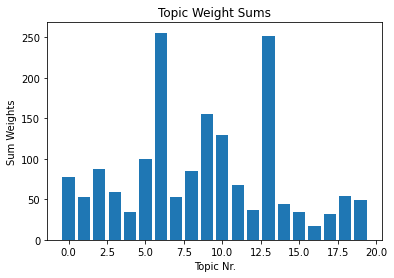

[(0, 77.317116), (1, 52.78249), (2, 86.74775), (3, 58.97297), (4, 34.845535), (5, 100.25584), (6, 255.47217), (7, 52.44101), (8, 84.37376), (9, 155.50856), (10, 129.48714), (11, 67.06652), (12, 36.872536), (13, 251.71777), (14, 44.515396), (15, 34.21166), (16, 17.548185), (17, 32.140415), (18, 53.809845), (19, 48.913437)]


In [ ]:
#@markdown ##Gesamt-Topic-Weights als Liste speichern?
save_doc = True #@param {type:"boolean"}

#@markdown #Grafik speichern?
save_fig = True #@param {type:"boolean"}

top_weight_sum = {}

for i, line in enumerate(doc_tops_gensim):
  for tup in line:
    if tup[0] not in top_weight_sum:
      top_weight_sum[tup[0]] = tup[1]
    if tup[0] in top_weight_sum:
      top_weight_sum[tup[0]] += tup[1]

points = []
for top, weight in top_weight_sum.items():
  points.append((top, weight))

weights_reverse = [(tup[1], tup[0]) for tup in points]
weights_sorted = sorted(weights_reverse, reverse=True)
print(weights_sorted)

if save_doc:
  out = open(user_output+user+'_Gensim_top_weight_sums_'+name_dataset_gensim+'_'+str(topics_gensim)+'topics_'+ now +'.txt', 'w', encoding='UTF-8')
  for line in weights_sorted:
    out.write(str(line))
  out.close()

x, y = list(zip(*points))
pylab.bar(x, y)
pylab.title('Topic Weight Sums')
pylab.ylabel('Sum Weights')
pylab.xlabel("Topic Nr.")
if save_fig:
  pylab.savefig(user_output+user+'_Gensim_topic_weight_sums_'+ name_dataset_gensim + '_' + str(topics_gensim) + 'topics'+ now +'.pdf')

pylab.show()

print(points)

Mallet

[(518.2820707567128, 44), (309.2117784578916, 14), (300.4900844120011, 43), (295.1868101908808, 30), (291.68139370345546, 39), (288.5957741060762, 21), (267.9073478202447, 37), (264.6676556535156, 20), (256.20931563649566, 46), (246.88465159619975, 34), (243.5688028769123, 31), (223.43517029000122, 7), (221.44595463208398, 49), (219.0857695951105, 45), (201.1569921074553, 35), (183.80284892846504, 32), (172.03174793132175, 19), (171.51153342364123, 23), (171.0400937733314, 0), (163.7860523101438, 5), (156.74613377147156, 24), (149.8105065821182, 4), (147.89929548106323, 22), (138.05091294741666, 38), (136.7057386971464, 48), (135.19096609845255, 16), (135.13919575349618, 12), (128.0083199402291, 6), (123.94914732898444, 28), (115.06942636396083, 47), (113.73073761802046, 1), (113.2739504585301, 9), (110.8757287714564, 11), (110.8022683125811, 33), (105.96277303936871, 17), (103.30099318435524, 15), (101.70367475918142, 13), (91.70166379562531, 27), (90.59240133728727, 41), (86.42332076

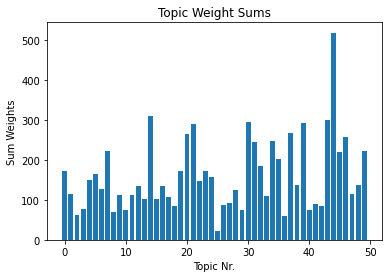

[(0, 171.0400937733314), (1, 113.73073761802046), (2, 62.16659579738137), (3, 76.53210286046512), (4, 149.8105065821182), (5, 163.7860523101438), (6, 128.0083199402291), (7, 223.43517029000122), (8, 70.80759545933418), (9, 113.2739504585301), (10, 74.99238491916489), (11, 110.8757287714564), (12, 135.13919575349618), (13, 101.70367475918142), (14, 309.2117784578916), (15, 103.30099318435524), (16, 135.19096609845255), (17, 105.96277303936871), (18, 84.86679309516848), (19, 172.03174793132175), (20, 264.6676556535156), (21, 288.5957741060762), (22, 147.89929548106323), (23, 171.51153342364123), (24, 156.74613377147156), (25, 22.98209595125527), (26, 86.42332076250351), (27, 91.70166379562531), (28, 123.94914732898444), (29, 74.77334173701223), (30, 295.1868101908808), (31, 243.5688028769123), (32, 183.80284892846504), (33, 110.8022683125811), (34, 246.88465159619975), (35, 201.1569921074553), (36, 58.98743004244691), (37, 267.9073478202447), (38, 138.05091294741666), (39, 291.6813937034

In [ ]:
#@markdown ##Gesamt-Topic-Weights als Liste speichern?
save_doc = False #@param {type:"boolean"}

#@markdown #Grafik speichern?
save_fig = False #@param {type:"boolean"}

top_weight_sum = {}

for i, line in enumerate(doc_tops_mallet):
  for tup in line:
    if tup[0] not in top_weight_sum:
      top_weight_sum[tup[0]] = tup[1]
    if tup[0] in top_weight_sum:
      top_weight_sum[tup[0]] += tup[1]

points = []
for top, weight in top_weight_sum.items():
  points.append((top, weight))

weights_reverse = [(tup[1], tup[0]) for tup in points]
weights_sorted = sorted(weights_reverse, reverse=True)
print(weights_sorted)

if save_doc:
  out = open(user_output+user+'_Mallet_top_weight_sums_'+name_dataset_mallet+'_'+str(topics_mallet)+'topics_'+ now +'.txt', 'w', encoding='UTF-8')
  for line in weights_sorted:
    out.write(str(line))
  out.close()

x, y = list(zip(*points))
pylab.bar(x, y)
pylab.title('Topic Weight Sums')
pylab.ylabel('Sum Weights')
pylab.xlabel("Topic Nr.")
if save_fig:
  pylab.savefig(user_output+user+'_Mallet_topic_weight_sums_'+ name_dataset_mallet + '_' + str(topics_mallet) + 'topics'+ now +'.pdf')
pylab.show() 

print(points)

### Verteilung Chunks über Topics [Funktioniert für beide Engines, Streuungsmaß für den zweiten Teil des Codes (nach der Visualisierung) und Gewichtung Topics/Doc [-> Threshold bei Mallet auf >= 0.1] muss noch mathematisch optimiert werden, Prio 1]

Gensim

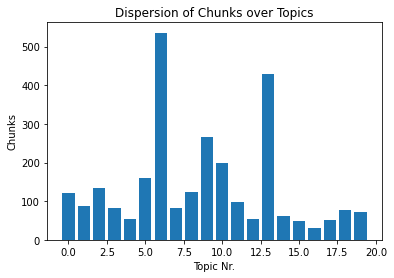

64.98736005778258
138.45
30
536
2769


In [ ]:
#@markdown #Grafik speichern?
save_fig = True #@param {type:"boolean"}

now = str(datetime.now())[:19]

int_id = ''
docs_per_top_counter = [[i] for i in range(int(topics_gensim))]

for i, line in enumerate(doc_tops_gensim):
  for tup in line:
      if float(tup[1]) >= average_weight_gensim: # Threshold für Topic Weight
        docs_per_top_counter[tup[0]].append(raw_data[i][0][:5])

#print(docs_per_top_counter)
points = []
for top in docs_per_top_counter:
  points.append((top[0], len(top)-1))

#########################################################################################
### Visualisierung kann eingeschaltet werden, dauert aber je nach Größe des Datensatzes
#########################################################################################

x, y = list(zip(*points))
pylab.bar(x, y)
pylab.title('Dispersion of Chunks over Topics')
pylab.ylabel('Chunks')
pylab.xlabel("Topic Nr.")
if save_fig:
  pylab.savefig(user_output+user+'_Gensim_chunks_per_top_'+ name_dataset_gensim + '_' + str(topics_gensim) + 'topics'+ now +'.pdf')
pylab.show()

sum_docs = 0

for top in docs_per_top_counter:
  sum_docs = sum_docs + (len(top)-1) 

durchschnitt = sum_docs / topics_gensim

varianz = 0

for top in docs_per_top_counter:
  varianz = varianz + (((((len(top)-1) - durchschnitt)**2)**0.5) / durchschnitt) * 100

standardabweichung = varianz/topics_gensim
print(standardabweichung)

min = 999999999
for top in docs_per_top_counter:
  if (len(top)-1) < min:
    min = len(top) - 1 

max = 0
for top in docs_per_top_counter:
  if (len(top)-1) > max:
    max = len(top) - 1 
print(durchschnitt) 
print(min)
print(max)
print(sum_docs)

Mallet

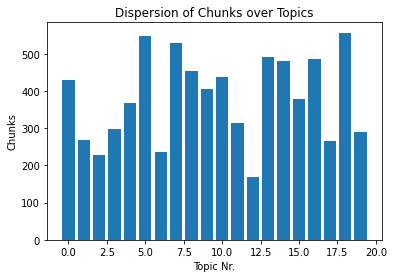

26.158680282796546
381.9
169
557
7638


In [ ]:
#@markdown #Grafik speichern?
save_fig = True #@param {type:"boolean"}

now = str(datetime.now())[:19]

int_id = ''
docs_per_top_counter = [[i] for i in range(int(topics_mallet))]

for i, line in enumerate(doc_tops_mallet):
#  print(data[i])
  for tup in line:
    if float(tup[1]) >= average_weight_mallet: # Threshold für Topic-Weight
      docs_per_top_counter[tup[0]].append(raw_data[i][0][:5])

#print(docs_per_top_counter)
points = []
for top in docs_per_top_counter:
  points.append((top[0], len(top)-1))

#########################################################################################
### Visualisierung kann eingeschaltet werden, dauert aber je nach Größe des Datensatzes
#########################################################################################

x, y = list(zip(*points))
pylab.bar(x, y)
pylab.title('Dispersion of Chunks over Topics')
pylab.ylabel('Chunks')
pylab.xlabel("Topic Nr.")
if save_fig:
  pylab.savefig(user_output+user+'_Mallet_chunks_per_top_'+ name_dataset_mallet + '_' + str(topics_mallet) + 'topics' + now +'.pdf')
pylab.show()

sum_docs = 0

for top in docs_per_top_counter:
  sum_docs = sum_docs + (len(top)-1) 

durchschnitt = sum_docs / topics_mallet

varianz = 0

for top in docs_per_top_counter:
  varianz = varianz + (((((len(top)-1) - durchschnitt)**2)**0.5) / durchschnitt) * 100

standardabweichung = varianz/topics_mallet
print(standardabweichung)

min = 999999999
for top in docs_per_top_counter:
  if (len(top)-1) < min:
    min = len(top) - 1 

max = 0
for top in docs_per_top_counter:
  if (len(top)-1) > max:
    max = len(top) - 1 
print(durchschnitt) 
print(min)
print(max)
print(sum_docs)

### Verteilung Topics über Gesamtdokumente

Gensim

(19, 0.9999969)
(13, 0.9999956)
(18, 0.9973326)
(4, 0.9295342)
(8, 0.9999977)
(17, 0.99999636)
(15, 0.9999872)
[('Dresden_UB_Mscr_F_98_edited', 1), ('Freiburg_UB_Hs__471_edited', 1), ('Heidelberg_UB_Cpg_116_edited', 1), ('Heidelberg_UB_cpg_475_edited', 1), ('Muenchen_BSB_Cgm_568_edited', 1), ('Stuttgart_LB_HB_V_22_edited', 1), ('Wolfenbüttel_HAB_Cod_16_17_edited', 1)]


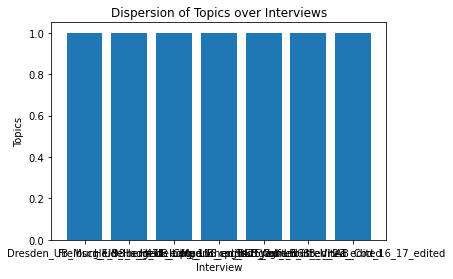

1.0
1
1


In [ ]:
#@markdown ##Threshold Topic-Weight
#@markdown If custom value is not checked, average topic weight is set as threshold.
threshold_custom_value = False #@param {type:"boolean"}
if threshold_custom_value == False:
  threshold_topic_weight = average_weight_gensim
if threshold_custom_value == True:
  threshold_topic_weight = 0.8 #@param {type:"number"}


if user == 'Dennis':


  tops_per_int_counter = []
  id_counter = 0
  interview_nr = ''

  for i, line in enumerate(doc_tops_gensim):
    if raw_data[i][0][:5] != interview_nr: 
      if i > 0:
        tops_per_int_counter.append(interview)
      interview_nr = raw_data[i][0][:5] 
      interview = [interview_nr]
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])
      continue
  
    if raw_data[i][0][:5] == interview_nr:
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])
 

if user == 'Ina':


  tops_per_int_counter = []
  id_counter = 0
  interview_nr = ''
  if name_dataset_gensim == 'twinger_chronik_fulltext':
    for i, line in enumerate(doc_tops_gensim):
        interview_nr = raw_data[i][0].split('.')[0]
        interview = [interview_nr]
        for tup in line:
          if tup[1] > threshold_topic_weight:
            interview.append(tup[0])
            print(tup)
        tops_per_int_counter.append(interview)


  else:
    for i, line in enumerate(doc_tops_gensim):
      if raw_data[i][0].split('.')[0] != interview_nr:
        if i > 0:
          tops_per_int_counter.append(interview)
        interview_nr = raw_data[i][0].split('.')[0]
        interview = [interview_nr]
        for tup in line:
          if tup[0] not in interview and tup[1] > threshold_topic_weight:
            interview.append(tup[0])
        continue
  
      if raw_data[i][0].split('.')[0] == interview_nr:
        for tup in line:
          if tup[0] not in interview and tup[1] > threshold_topic_weight:
            interview.append(tup[0])


if user == 'Tobias':
  
  tops_per_int_counter = []
  id_counter = 0
  interview_nr = ''

  for i, line in enumerate(doc_tops_gensim):
    if raw_data[i][0][:17] != interview_nr: 
      if i > 0:
        tops_per_int_counter.append(interview)
      interview_nr = raw_data[i][0][:17] 
      interview = [interview_nr]
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])
      continue
  
    if raw_data[i][0][:17] == interview_nr:
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])


#########################################################################################
### Visualisierung kann eingeschaltet werden, dauert aber je nach Größe des Datensatzes
#########################################################################################


points = []
for top in tops_per_int_counter:
  points.append((top[0], len(top)-1))  
print(points)     
x, y = list(zip(*points))
pylab.bar(x, y)
pylab.title('Dispersion of Topics over Interviews')
pylab.ylabel('Topics')
pylab.xlabel("Interview")
pylab.show()

durchschnitt = 0

for top in tops_per_int_counter:
  durchschnitt = durchschnitt + (len(top)-1) 

durchschnitt = durchschnitt / len(tops_per_int_counter)

min = 999999999
for top in tops_per_int_counter:
  if (len(top)-1) < min:
    min = len(top) - 1 

max = 0
for top in tops_per_int_counter:
  if (len(top)-1) > max:
    max = len(top) - 1 
print(durchschnitt) 
print(min)
print(max)

Mallet

(4, 0.455042268663258)
(10, 0.4425737382155764)
(3, 0.4129654513222677)
(4, 0.49377557917957293)
(4, 0.2360274770052268)
(17, 0.7546782830372643)
(2, 0.4262349666409001)
(4, 0.3124586751325228)
(4, 0.43729796300874696)
(13, 0.425228689749127)
(4, 0.48508218881467574)
(18, 0.4207068744989542)
(4, 0.36471024253355266)
(10, 0.09923198618337474)
(15, 0.52852323665937)
[('Dresden_UB_Mscr_F_98_edited', 2), ('Freiburg_UB_Hs__471_edited', 2), ('Heidelberg_UB_Cpg_116_edited', 2), ('Heidelberg_UB_cpg_475_edited', 2), ('Muenchen_BSB_Cgm_568_edited', 2), ('Stuttgart_LB_HB_V_22_edited', 2), ('Wolfenbüttel_HAB_Cod_16_17_edited', 3)]


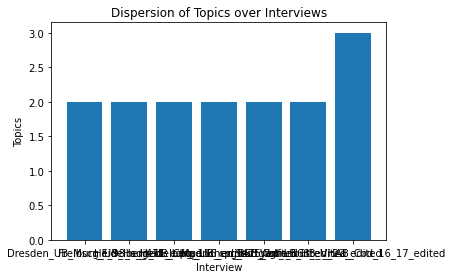

2.142857142857143
2
3


In [ ]:
#@markdown ##Threshold Topic-Weight
#@markdown If custom value is not checked, average topic weight is set as threshold.
threshold_custom_value = True #@param {type:"boolean"}
if threshold_custom_value == False:
  threshold_topic_weight = average_weight_gensim
if threshold_custom_value == True:
  threshold_topic_weight = 0.09 #@param {type:"number"}


if user == 'Dennis':


  tops_per_int_counter = []
  id_counter = 0
  interview_nr = ''

  for i, line in enumerate(doc_tops_mallet):
    if raw_data[i][0][:5] != interview_nr:
      if i > 0:
        tops_per_int_counter.append(interview)
      interview_nr = raw_data[i][0][:5]
      interview = [interview_nr]
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])
      continue
  
    if raw_data[i][0][:5] == interview_nr:
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])


if user == 'Ina':


  tops_per_int_counter = []
  id_counter = 0
  interview_nr = ''
  if name_dataset_mallet == 'twinger_chronik_fulltext':
    for i, line in enumerate(doc_tops_mallet):
        interview_nr = raw_data[i][0].split('.')[0]
        interview = [interview_nr]
        for tup in line:
          if tup[1] > threshold_topic_weight:
            interview.append(tup[0])
            print(tup)
        tops_per_int_counter.append(interview)


  else:
    for i, line in enumerate(doc_tops_mallet):
      if raw_data[i][0].split('.')[0] != interview_nr:
        if i > 0:
          tops_per_int_counter.append(interview)
        interview_nr = raw_data[i][0].split('.')[0]
        interview = [interview_nr]
        for tup in line:
          if tup[0] not in interview and tup[1] > threshold_topic_weight:
            interview.append(tup[0])
        continue
  
      if raw_data[i][0].split('.')[0] == interview_nr:
        for tup in line:
          if tup[0] not in interview and tup[1] > threshold_topic_weight:
            interview.append(tup[0])


if user == 'Tobias':

  tops_per_int_counter = []
  id_counter = 0
  interview_nr = ''

  for i, line in enumerate(doc_tops_mallet):
    if raw_data[i][0][:17] != interview_nr:
      if i > 0:
        tops_per_int_counter.append(interview)
      interview_nr = raw_data[i][0][:17]
      interview = [interview_nr]
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])
      continue
  
    if raw_data[i][0][:17] == interview_nr:
      for tup in line:
        if tup[0] not in interview and tup[1] > threshold_topic_weight:
          interview.append(tup[0])


#########################################################################################
### Visualisierung kann eingeschaltet werden, dauert aber je nach Größe des Datensatzes
#########################################################################################


points = []
for top in tops_per_int_counter:
  points.append((top[0], len(top)-1))  
print(points)     
x, y = list(zip(*points))
pylab.bar(x, y)
pylab.title('Dispersion of Topics over Interviews')
pylab.ylabel('Topics')
pylab.xlabel("Interview")
pylab.show()

durchschnitt = 0

for top in tops_per_int_counter:
  durchschnitt = durchschnitt + (len(top)-1) 

durchschnitt = durchschnitt / len(tops_per_int_counter)

min = 999999999
for top in tops_per_int_counter:
  if (len(top)-1) < min:
    min = len(top) - 1 

max = 0
for top in tops_per_int_counter:
  if (len(top)-1) > max:
    max = len(top) - 1 
print(durchschnitt) 
print(min)
print(max)
